<a href="https://colab.research.google.com/github/helenatong/oc_p2_analyse_exploratoire_dataset/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Introduction**


---


## **Pré-requis** -
- Télécharger [zip file](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip) dans Google Drive
- Modifier les chemins des fichiers (zip_path et extract_path) dans le code

 - 5 fichiers sont présents dans le zip: EdStatsCountry, EdStatsCountry-Series, EdStatsData, EdStatsFootNote, EdStatsSeries.
 - Leurs noms respectifs sont : country, country_series, data, foot_note, series



 ## **Sommaire**

### **I. Installation et mise en place de l'environnement de travail**

### **II. Définitions des fonctions auxiliaires**

### **III. Analyse exploratoire**
Etude indépendante des 5 datasets (Parties A, B, C, D, E).

Chaque étude est divisée en 3 sous-parties :
  1. Importation du csv et vérification de l'importation
  2. Analyse générale des données (dimension, variable, description des données)
  3. Bilan

L'analyse exploratoire se conclue sur un bilan général

### **IV. Analyse approfondie et qualité des dataset**
Etude indépendante des 5 datasets.

Chaque étude est en 3 parties :
  1. Valeurs manquantes, doublons, type/format irrégulier des données
  2. Graphiques - Vue générale sur la donnée
  3. Bilan

L'analyse appronfondie se conclue sur un bilan général

### **V. Filtrage et Nettoyage pour le choix des variables définitives**

# To del

In [ ]:
print('------------------------------')

To do : changer le type des données (Ex : code postale peut poser pbm)
- Mettre du github en anglais, pour partager l'info - si freelance, est intéresssant. Dès qq chose de nouveau => commit ! carré vert, 1er indicateur visuel.
- Notebook != jamais utilisé en production
=> Favoriser les fichiers .py puis copier-coller sur Notebook, négocier des offres, rôle + sénior

# I. Installation et mise en place de l'environnement de travail

In [ ]:
# Importation des librairies

import numpy as np
import pandas as pd

import zipfile
import os

import re

import sys

import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [ ]:
# Informations sur l'environnement virtuel

print('Version des librairies :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)

now  = datetime.datetime.now().isoformat()
print('Run date      : ' + now)

Version des librairies :
Python        : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
NumPy         : 1.23.5
Pandas        : 1.5.3
Matplotlib    : 3.7.1
Seaborn       : 0.13.1
Run date      : 2024-01-19T13:10:25.694299


In [ ]:
# Configurations de l'affichages des données

pd.set_option('display.max_columns', None)

In [ ]:
# Connexion au drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dézipper les 5 fichiers

##⚙️Changer les 2 chemins ci-dessous
zip_path = '/content/drive/MyDrive/openclassrooms/project_list/project_2/Projet+Python_Dataset_Edstats_csv.zip'
extract_path = '/content/drive/MyDrive/openclassrooms/project_list/project_2/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

path_country = os.path.join(extract_path, 'EdStatsCountry.csv')
path_country_series = os.path.join(extract_path, 'EdStatsCountry-Series.csv')
path_data = os.path.join(extract_path, 'EdStatsData.csv')
path_foot_note = os.path.join(extract_path, 'EdStatsFootNote.csv')
path_series = os.path.join(extract_path, 'EdStatsSeries.csv')

# II. Définitions des fonctions auxiliaires


In [ ]:
# Calcule le pourcentage de donnée NaN

"""
    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
    pandas.Series: A Series containing the percentage of missing values for each column.
"""
def percentage_isna(df):
  return(df.isna().mean() * 100)


In [ ]:
# Extrait l'année YYYY en trouvant les 4 premiers chiffres

def extract_year(chaine):
    if isinstance(chaine, str):
        match = re.search(r'\d{4}', chaine)
        if match:
            return match.group()
    return np.nan

In [ ]:
# Extrait la valeur la plus récente

"""
    Parameters:
    row (panda.list): data for 1 row
    years (panda.list): list of year, have to be sorted in decreasing order

    Returns:
    An integer or NaN value
"""
def get_latest_value(row, years):
    for year in years:
        if not pd.isna(row[year]):
            return row[year]
    return np.NaN

# III. Analyse exploratoire

Dans cette partie, je vais étudier les 5 fichiers les uns après les autres de manière indépendante.

Voici les différentes étapes de l'analyse exploratoire pour un fichier donné :

- Importer le fichier
- Vérifier si l'importation a bien été effectuée
- Afficher les données suivantes : nombre de lignes, de colonnes, type des variables et voir leurs statistiques
- Conclure sur le dataset

## A. Dataset Footnote


In [ ]:
# Importation du fichier et vérification de l'import

foot_note = pd.read_csv(path_foot_note)
print(foot_note.head(3), end = '\n\n')
print('------------------------------')
print(foot_note.tail(3), end = '\n\n')
print('------------------------------')
print(foot_note.sample(3))

  CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

------------------------------
       CountryCode   SeriesCode    Year  \
643635         ZWE  SH.DYN.MORT  YR2015   
643636         ZWE  SH.DYN.MORT  YR2017   
643637         ZWE  SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN  

------------------------------
       CountryCode      SeriesCode    Year  \
449595         NGA    UIS.OAPP.1.M  YR2004   
125514         CYP  SP.PRM.GRAD.FE  YR1997   
486890         PNG  SH.DYN.AIDS.ZS  YR2008   

                                           DESCRIP

In [ ]:
# Dimension et statistiques générales des variables

# Dimension
nRow, nCol  = foot_note.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')
print('------------------------------')

# Nom des colonnes
print("LISTE DES COLONNES :", foot_note.columns.to_list(), end='\n\n')
print('------------------------------')

# Statistiques des variables qualitatives
print("VARIABLES QUALITATIVES :\n", foot_note.describe(exclude=[np.number]), end='\n\n')
print('------------------------------')

# Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES :\n", foot_note.describe(), end='\n\n')
print('------------------------------')

# Type des variables
print("TYPE DES VARIABLES :\n", foot_note.dtypes, sep='', end='\n\n')

NB DE LIGNES   : 643638
NB DE COLONNES : 5

------------------------------
LISTE DES COLONNES : ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

------------------------------
VARIABLES QUALITATIVES :
        CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

------------------------------
VARIABLES QUANTITATIVES :
        Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

------------------------------
TYPE DES VARIABLES :
CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object



**Bilan**

Le dataset foot_note décrit comment les données d'une série pour une année donnée, c'est-à-dire un indicateur, ont été estimées.

Le dataset contient 643638 lignes et 5 colonnes.

---
A noter si on utilise cette base de données:
*   Supression de la colonne vide (Unnamed: 4)
*   Modifier le type de la variable 'Year'

## B. Dataset Country Series

In [ ]:
# Importation du fichier et vérification de l'import

country_series = pd.read_csv(path_country_series)
print(country_series.head(3), end = '\n\n')
print('------------------------------')
print(country_series.tail(3), end = '\n\n')
print('------------------------------')
print(country_series.sample(3))

  CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  

------------------------------
    CountryCode   SeriesCode  \
610         ZMB  SP.POP.TOTL   
611         ZWE  SP.POP.TOTL   
612         ZWE  SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
610  Data sources : United Nations World Population...         NaN  
611  Data sources : United Nations World Population...         NaN  
612  Data sources: United Nations World Population ...         NaN  

------------------------------
    CountryCode         SeriesCode  \
369         MOZ        SP.POP.GROW   
183         GEO  SP.POP.1564.MA.IN   
442         PSE  SP.POP.0014

In [ ]:
# Dimension et statistiques générales des variables

## Dimension
nRow, nCol  = country_series.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')
print('------------------------------')

## Nom des colonnes
print("LISTE DES COLONNES :", country_series.columns.to_list(), end='\n\n')
print('------------------------------')

## Statistiques des variables qualitatives
print("VARIABLES QUALITATIVES :\n", country_series.describe(exclude=[np.number]), end='\n\n')
print('------------------------------')

## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES :\n", country_series.describe(), end='\n\n')
print('------------------------------')

## Type des variables
print("TYPE DES VARIABLES :\n", country_series.dtypes, sep='', end='\n\n')

NB DE LIGNES   : 613
NB DE COLONNES : 4

------------------------------
LISTE DES COLONNES : ['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

------------------------------
VARIABLES QUALITATIVES :
        CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  

------------------------------
VARIABLES QUANTITATIVES :
        Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

------------------------------
TYPE DES VARIABLES :
CountryCode     object
SeriesCode      o

**Bilan**

Le dataset country_series indique la base de données à partir de laquelle les données ont été obtenues.

Il y a en tout 613 descriptions, sur 21 séries distinctes.

Le dataset contient 613 lignes et 4 colonnes.

---
A noter si on utilise cette base de données:
*   Supression de la colonne vide (Unnamed: 3)

## C. Dataset Country

In [ ]:
# Importation du fichier et vérification de l'import

country = pd.read_csv(path_country)
print(country.head(3), end = '\n\n')
print('------------------------------')
print(country.tail(3), end = '\n\n')
print('------------------------------')
print(country.sample(3))

  Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   

  National accounts base year  National accounts reference year  \
0                

In [ ]:
# Dimension et statistiques générales des variables

## Dimension
nRow, nCol  = country.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')
print('------------------------------')

## Nom des colonnes
print("LISTE DES COLONNES :", country.columns.to_list(), end='\n\n')
print('------------------------------')

## Statistiques des variables qualitatives
print("VARIABLES QUALITATIVES :\n", country.describe(exclude=[np.number]), end='\n\n')
print('------------------------------')

## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES :\n", round(country.describe(), 0), end='\n\n')
print('------------------------------')

# Type des variables
print("TYPE DES VARIABLES :\n", country.dtypes, sep='', end='\n\n')

NB DE LIGNES   : 241
NB DE COLONNES : 32

------------------------------
LISTE DES COLONNES : ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']

------------------------------
VARIABLES QUALITATIVES :
        Country Code Short Name Table Name Long Name 2-alpha code  \
cou

**Bilan**

Le dataset country contient des informations sur 241 pays.

Parmi ces informations, certaines variables semblent pertinentes pour la suite de notre analyse telles que :
- les pays (241 distincts)
- les zones géographique des pays (7 distinctes)
- les groupes économique des pays (5 distincts) nous avons des informations
- et d'autres groupes (2 distincts)

Le dataset contient 241 lignes et 32 colonnes.

---
A noter si on utilise cette base de données:
*   Supression de la colonne vide (Unnamed: 31)
*   Les informations sur les différents groupes auxquels les pays appartiennent sont à extraire
*   Modifier le type des variables de date si on les utilise :

National accounts base year, Latest population census, Latest household survey, PPP survey year, Source of most recent Income and expenditure data, Latest water withdrawal data

## D. Dataset Data


In [ ]:
# Importation du fichier et vérification de l'import

data = pd.read_csv(path_data)
print(data.head(3), end = '\n\n')
print('------------------------------')
print(data.tail(3), end = '\n\n')
print('------------------------------')
print(data.sample(3))

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   

In [ ]:
# Dimension et statistiques générales des variables

## Dimension
nRow, nCol  = data.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')
print('------------------------------')

## Nom des colonnes
print("LISTE DES COLONNES :", data.columns.to_list(), end='\n\n')
print('------------------------------')

## Statistiques des variables qualitatives
print("VARIABLES QUALITATIVES :\n", data.describe(exclude=[np.number]), end='\n\n')
print('------------------------------')

## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES :\n", round(data.describe(), 0), end='\n\n')
print('------------------------------')

## Type des variables
print("TYPE DES VARIABLES :\n", data.dtypes, sep='', end='\n\n')

NB DE LIGNES   : 886930
NB DE COLONNES : 70

------------------------------
LISTE DES COLONNES : ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69']

------------------------------
VARIABLES QUALITATIVES :
        Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                           Indicator Name In

**Bilan**

Le dataset data contient les données récoltées entre 1970 et 2100 de 3665 indicateurs pour 242 pays.

Nous avons 2 catégories de données : celles qui sont mesurées (tous les ans entre 1970 et 2017) et les données prévisionnelles (tous les 5 ans entre 2020 et 2100).

Le dataset contient contient 886930 lignes et 70 colonnes.

Les statistiques générales sur les années montrent qu'il y a 10^4 données avant 1998 inclus et après 2016 inclus, et plus de 10^5 données entre 1999 et 2015 inclus.

A priori, davantage de données ont été renseignées à partir de 1999 (hors données prévisionnelles).

---
A noter si on utilise cette base de données:
*   Supression de la colonne vide (Unnamed: 69)
*   Faire attention aux valeurs manquantes

## E. Dataset Series

In [ ]:
# Importation du fichier et vérification de l'import

series = pd.read_csv(path_series)
print(series.head(3), end = '\n\n')
print('------------------------------')
print(series.tail(3), end = '\n\n')
print('------------------------------')
print(series.sample(3))

           Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN       

In [ ]:
# Dimension et statistiques générales des variables

## Dimension
nRow, nCol  = series.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')
print('------------------------------')

## Nom des colonnes
print("LISTE DES COLONNES :", series.columns.to_list(), end='\n\n')
print('------------------------------')

## Statistiques des variables qualitatives
print("VARIABLES QUALITATIVES :\n", series.describe(exclude=[np.number]), end='\n\n')
print('------------------------------')

## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES :\n", round(series.describe(), 0), end='\n\n')
print('------------------------------')

## Type des variables
print("TYPE DES VARIABLES :\n", series.dtypes, sep='', end='\n\n')

NB DE LIGNES   : 3665
NB DE COLONNES : 21

------------------------------
LISTE DES COLONNES : ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

------------------------------
VARIABLES QUALITATIVES :
                 Series Code              Topic  \
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               366

**Bilan**

Le dataset series contient les informations sur 3665 indicateurs, ce nombre est cohérent avec celui du dataset data.

Nous pouvons lire la définition des indicateurs et observer qu'il sont regroupés dans 37 catégories.

Le dataset Series contient 3665 lignes et 21 colonnes.
3665 indicateurs étudiées.

---
A noter si on utilise cette base de données:
*   Supression de la colonne vide (Unnamed: 20)


## Bilan général
Nous avons ici 5 datasets complémentaires qui contiennent les données de 3665 indicateurs (regroupés sous 37 thèmes), de 242 pays différents, entre 1970 et 2100 :
- Le dataset series contient les informations sur les indicateurs mesurés
- Le dataset country contient les informations liées au pays
- Le dataset data contient les données mesurées entre 1970 et 2100
- Les datasets foot note et country series donnent des informations complémentaires sur la source de données utilisées et d'autres informations

---
Il serait intéressant de visualiser les groupes auxquels les pays appartiennent, car l'un des objectif de cette analyse est de pouvoir étudier non seulement les pays mais également les groupes de pays pour en tirer des conclusion sur l'attractivité d'un pays.

---
Il y a quelques incohérences entre les datasets notamment sur :
- le nombre de pays étudiés (241 dans le dataset country, 242 dans les autres)
- l'importation des données (existence de colonnes vides (Unammed))
- les types pour les variables.

Nous allons vérifier la qualité et la cohérence des datasets dans l'analyse approfondis.


# IV. Analyse appronfondis - Qualité des datasets



Nous allons observer dans un premier temps les anomalies des datasets c'est-à-dire les valeurs manquantes et les doublons.

Ensuite, nous allons représenter graphiquement certaines données pour nous aider à creuser et mieux comprendre la donnée.

## A. Dataset Foot note

In [ ]:
# Valeurs manquantes

print("NOMBRE DE VALEURS MANQUANTES :\n", foot_note.isna().sum(), sep='', end='\n\n')

NOMBRE DE VALEURS MANQUANTES :
CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64



In [ ]:
# Doublons

duplicates = foot_note.duplicated(subset = ['CountryCode', 'SeriesCode', 'Year'])
per_duplicates = percentage_isna(duplicates)
print("% DE DOUBLONS (VARIABLES : ['CountryCode', 'SeriesCode', 'Year']): ", per_duplicates, sep='', end='\n\n')

% DE DOUBLONS (VARIABLES : ['CountryCode', 'SeriesCode', 'Year']): 0.0



In [ ]:
# Vérifier à l'oeil les erreurs de formats

print(foot_note['Year'].unique(), end='\n\n')

['YR2001' 'YR2005' 'YR2000' 'YR2004' 'YR2006' 'YR2003' 'YR1999' 'YR2008'
 'YR2002' 'YR2007' 'YR2017' 'YR2010' 'YR2009' 'YR2011' 'YR2012' 'YR2015'
 'YR2014' 'YR1970' 'YR1971' 'YR1972' 'YR1973' 'YR1974' 'YR1975' 'YR1976'
 'YR1977' 'YR1978' 'YR1979' 'YR1980' 'YR1981' 'YR1982' 'YR1983' 'YR1984'
 'YR1985' 'YR1986' 'YR1987' 'YR1988' 'YR1989' 'YR1990' 'YR1991' 'YR1992'
 'YR1993' 'YR1994' 'YR1995' 'YR1996' 'YR1997' 'YR1998' 'YR2013' 'YR2016'
 'YR2020' 'YR2025' 'YR2030' 'YR2035' 'YR2040' 'YR2045' 'YR2050' 'yr2012']



**Bilan**

Le dataset foot_note est complet. Il n'y a aucune donnée manquante (sauf pour la colonne vide Unnamed), ni de doublons.

Le type de l'année sera modifier pour pouvoir utiliser cette information dans les représentations graphiques.

Je vais proproser des représentations graphique de la donnée disponible dans le dataset country footnote.

Il y a 3 graphiques :

- Le nombre de description disponible par année
- le top 20 des indicateurs qui ont le plus de descriptions
- et le top 10 du contenu des indicateurs

In [ ]:
# Modification du type de la colonne 'Year' pour le tracé du graphique

foot_note['Year'] = pd.to_datetime(foot_note['Year'].str[2:], errors='coerce')
foot_note['Year'] = foot_note['Year'].dt.year

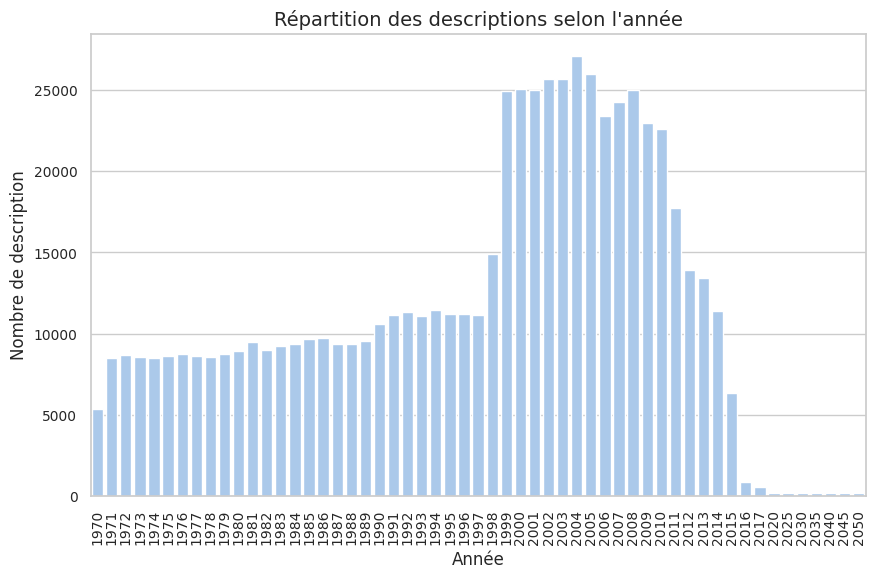

In [ ]:
# Voyons la répartition des données selon l'année

plt.figure(figsize = (10, 6))

sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.countplot(data = foot_note, x = 'Year')

plt.ylabel("Nombre de description", fontsize = 12)
plt.xlabel("Année", fontsize = 12)
plt.yticks(size = 10)
plt.xticks(rotation = 90, size = 10)
plt.title("Répartition des descriptions selon l'année", fontsize = 14)

plt.show()

Nous distinguons 3 groupes :
- Avant 1998, on a une peu moins de 10000 descriptions.
- Entre 1999 et 2010 , le nombre de description a été multiplié par 2.5.
- Après 2011, on a de moins en moins de descriptions et très peu pour les données prédites à partir de 2020.

La répartition de ces résultats est cohérente avec l'analyse exploratoire des données du dataset data.

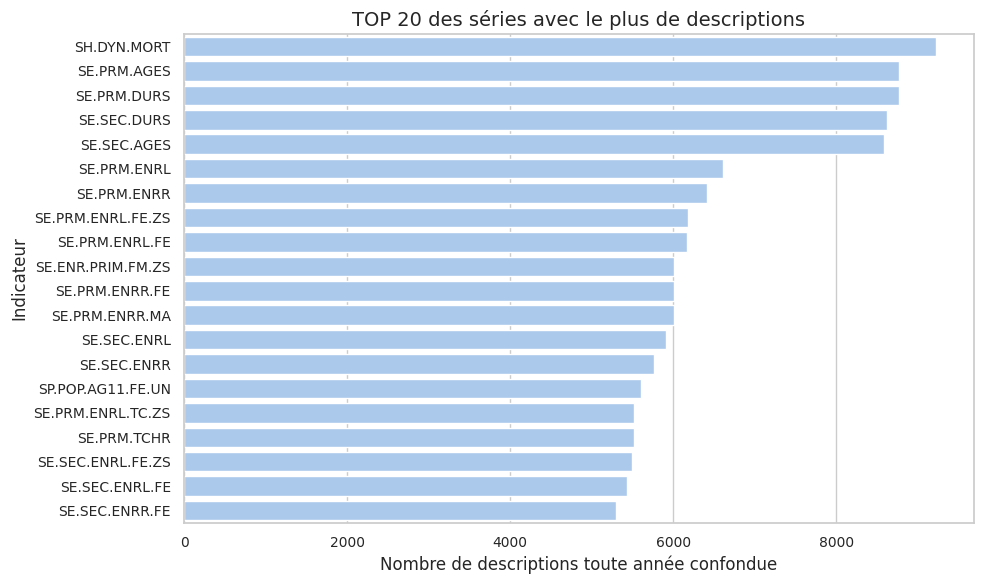

In [ ]:
# Voyons les series qui ont le plus de descriptions disponibles

plt.figure(figsize = (10, 6))
top_20_series = foot_note.groupby('SeriesCode').count().sort_values(by = ['CountryCode'], ascending = False)[:20]
top_20_series.reset_index(inplace = True)

sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.barplot(data = top_20_series, y = 'SeriesCode', x = 'CountryCode')

plt.xlabel("Nombre de descriptions toute année confondue", fontsize = 12)
plt.ylabel("Indicateur", fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("TOP 20 des séries avec le plus de descriptions", fontsize = 14)
plt.tight_layout()

plt.show()

Parmi le top 20 des indicateurs, on trouve l'accronyme SE (Social Education) et SP (Social Population).

Et également, SEC (Secondaire), PRM (Primary), POP (Population).

Ce sont tous des indicateurs potentiellement intéressants pour notre étude, étant du même ordre de grandeur, il est impossible de faire un choix des indicateurs à utiliser à partir de cette information.

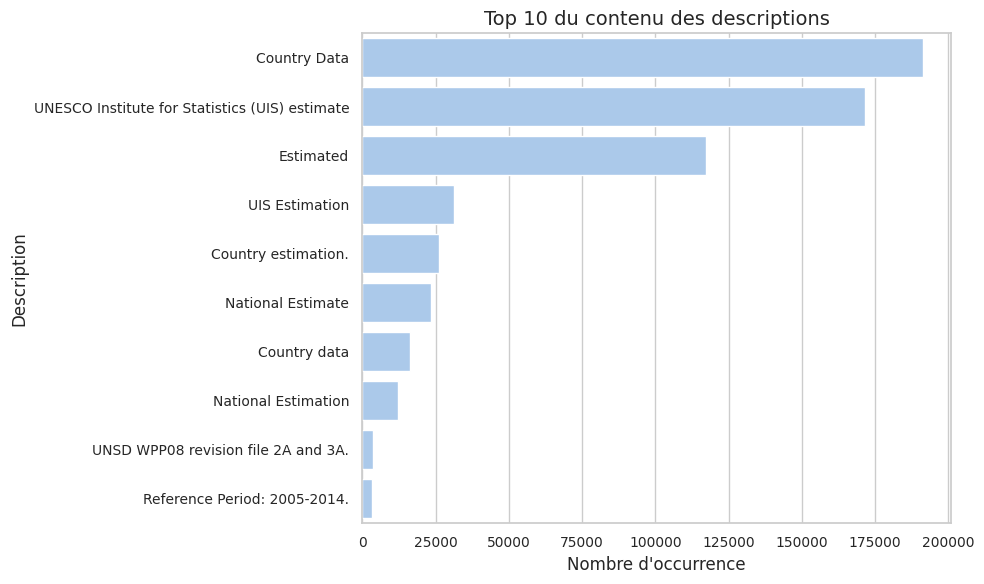

In [ ]:
# Déterminons les descriptions les plus présents dans le jeu de données

top_10_description = foot_note.groupby('DESCRIPTION').count().sort_values(by = ['CountryCode'], ascending = False)[:10]
top_10_description.reset_index(inplace = True)

plt.figure(figsize = (10, 6))
sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.barplot(data = top_10_description.loc[:, ['DESCRIPTION', 'CountryCode']], y = 'DESCRIPTION', x = 'CountryCode')

plt.xlabel("Nombre d'occurrence", fontsize = 12)
plt.ylabel("Description", fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Top 10 du contenu des descriptions", fontsize = 14)
plt.tight_layout()

plt.show()

3 descriptions sortent du lot : Country Data, UNESCO Institute for Statistics (UIS) estimate et Estimated.

Cela indique que la manière de calcul des indicateurs présente une forme d'homogénéïté dans l'ensemble, ce qui permet d'analyser des données qui sont comparables.

**Bilan**

Le dataset est complet et sans doublon. Toutefois, les informations de ce dataset ne semblent pas pertinentes pour la suite de notre analyse.

La présence de 5 indicateurs qui sortent du lot par rapport aux autres n'est pas une information suffisamment discriminante pour effectuer une sélection d'indicateurs.


## B. Dataset Country Series

In [ ]:
# Valeurs manquantes

print("NOMBRE DE VALEURS MANQUANTES :\n", country_series.isna().sum(), sep='', end='\n\n')

NOMBRE DE VALEURS MANQUANTES :
CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64



In [ ]:
# Doublons

duplicates = country_series.duplicated(subset = ['CountryCode', 'SeriesCode'])
per_duplicates = percentage_isna(duplicates)
print("% DE DOUBLONS (VARIABLES : ['CountryCode', 'SeriesCode']): ", per_duplicates, sep='', end='\n\n')

% DE DOUBLONS (VARIABLES : ['CountryCode', 'SeriesCode']): 0.0



Le dataset country_series est complet. Il n'y a aucune donnée manquante (sauf pour la colonne vide Unnamed), ni de doublons.

Graphiques

Je vais proproser 2 représentations graphique de la donnée disponible dans le dataset country series.

Une première représentation permet de voir pour chacun des 21 indicateurs,  combien de pays ont une sources de donnée renseignée. Une seconde représentation donne le top 10 des bases de données les plus utilisées.



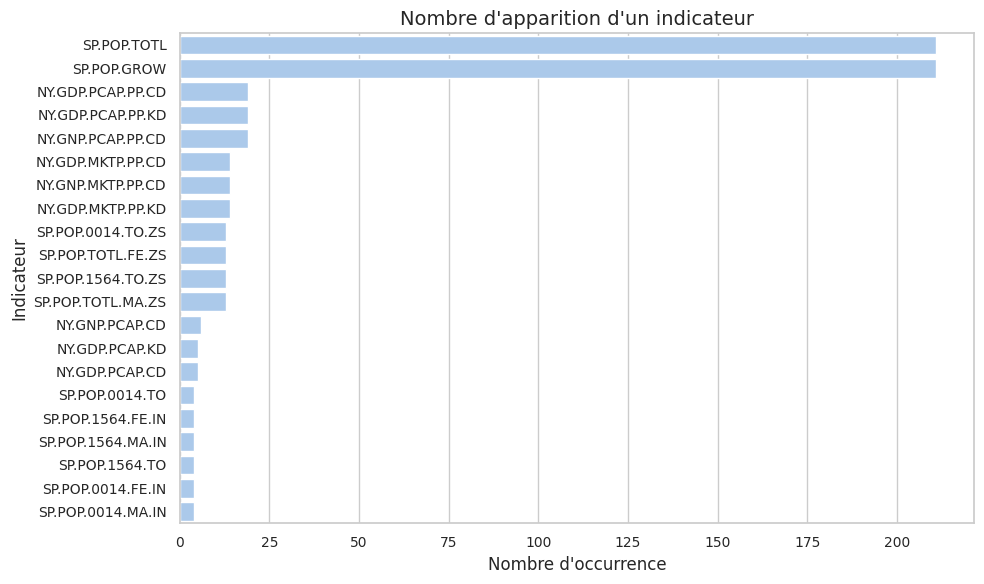

In [ ]:
# Voyons le nombre de pays possédant une description par série (21 au total)

plt.figure(figsize = (10, 6))
top_50_series = country_series.groupby('SeriesCode').count().sort_values(by = ['CountryCode'], ascending = False)
top_50_series.reset_index(inplace = True)

sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.barplot(data = top_50_series, y = 'SeriesCode', x = 'CountryCode')

plt.xlabel("Nombre d'occurrence", fontsize = 12)
plt.ylabel("Indicateur", fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Nombre d'apparition d'un indicateur", fontsize = 14)
plt.tight_layout()

plt.show()

D'après ce graphique, pour tous les pays, les bases de données utilisées pour les 2 indicateurs de population SP.POP.TOTL et SP.POP.GROW sont connus. Cette observation est attendue car souvent la population totale et sa croissance d'un pays est une mesure récurrente et déterminée par des grandes organisations.

Concernant les autres indicateurs, la base de données utilisée est connue pour moins de 25 pays. Parmi ceux-ci, il y a le PIB (ou GDP) ou d'autres mesures de population. Par le même raisonnement que le point précédent, la connaissance de la source de données utilisée n'est pas étonnante.

On remarquera que si un indicateur compte 42 occurrences, cela signifie que 200 occurences soit pays ne montrent pas d'informations. Le dataset est complet, mais il y a des données manquantes au sens de l'absence d'information.



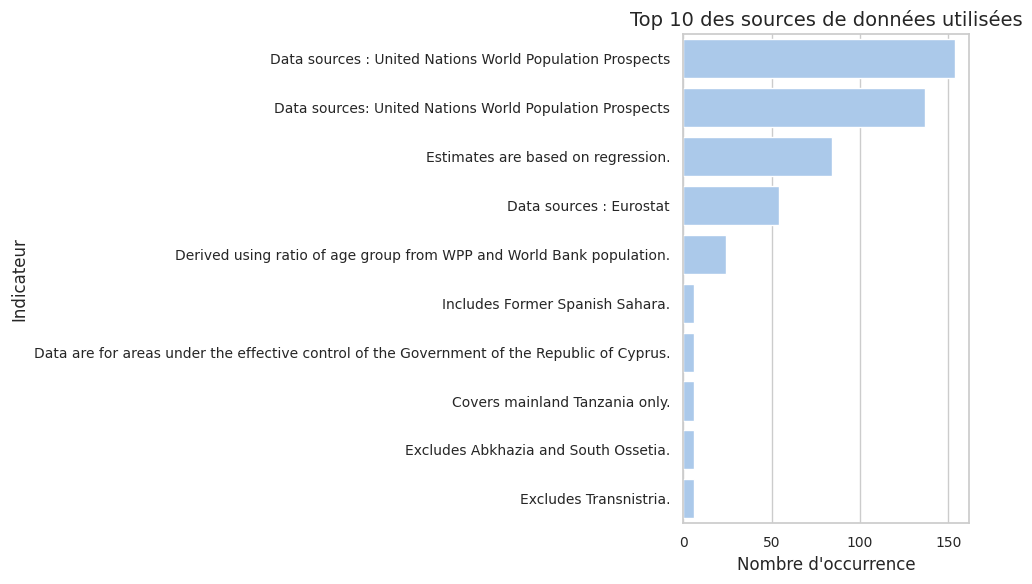

In [ ]:
# Déterminons le top 10 des sources de données les plus utilisée dans le jeu de données

top_10_description = country_series.groupby('DESCRIPTION').count().sort_values(by = ['CountryCode'], ascending = False)[:10]
top_10_description.reset_index(inplace=True)

plt.figure(figsize = (10, 6))

sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.barplot(data = top_10_description.loc[:, ['DESCRIPTION', 'CountryCode']], y = 'DESCRIPTION', x = 'CountryCode')

plt.xlabel("Nombre d'occurrence", fontsize = 12)
plt.ylabel("Indicateur", fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Top 10 des sources de données utilisées", fontsize = 14)
plt.tight_layout()

plt.show()

La source de donnée principale est celle fournie par l'organisme 'Population Division of the Department of Economic and Social Affairs of the United Nations Secretariat' qui se présente sous le nom de 'United Nations World Population Prospects'. Il y a également une source de données secondaire issues d'Eurostat.

Les données issues d'estimations sont nombreuses et probablement liées aux années 2020 à 2100.

Globalement les données des indicateurs sont issues de sources fiables.

**Bilan**

Ce dataset est propre, il n'y a aucune valeur manquante et aucun ligne duppliquée.

Les sources de données sont resteintes ce qui rend pertinent la comparaison des valeurs entre les pays.

Pour la suite, ce dataset ne contient pas de variables intéressantes.

## C. Dataset Country

VALEURS MANQUANTES :
                                                    NB      %
Unnamed: 31                                        241  100.0
National accounts reference year                   209   87.0
Alternative conversion factor                      194   80.0
Other groups                                       183   76.0
Latest industrial data                             134   56.0
Vital registration complete                        130   54.0
External debt Reporting status                     117   49.0
Latest household survey                            100   41.0
Latest agricultural census                          99   41.0
Lending category                                    97   40.0
PPP survey year                                     96   40.0
Special Notes                                       96   40.0
Source of most recent Income and expenditure data   81   34.0
Government Accounting concept                       80   33.0
Latest water withdrawal data                     

Text(0.5, 1.0, 'Matrice des valeurs manquantes \n')

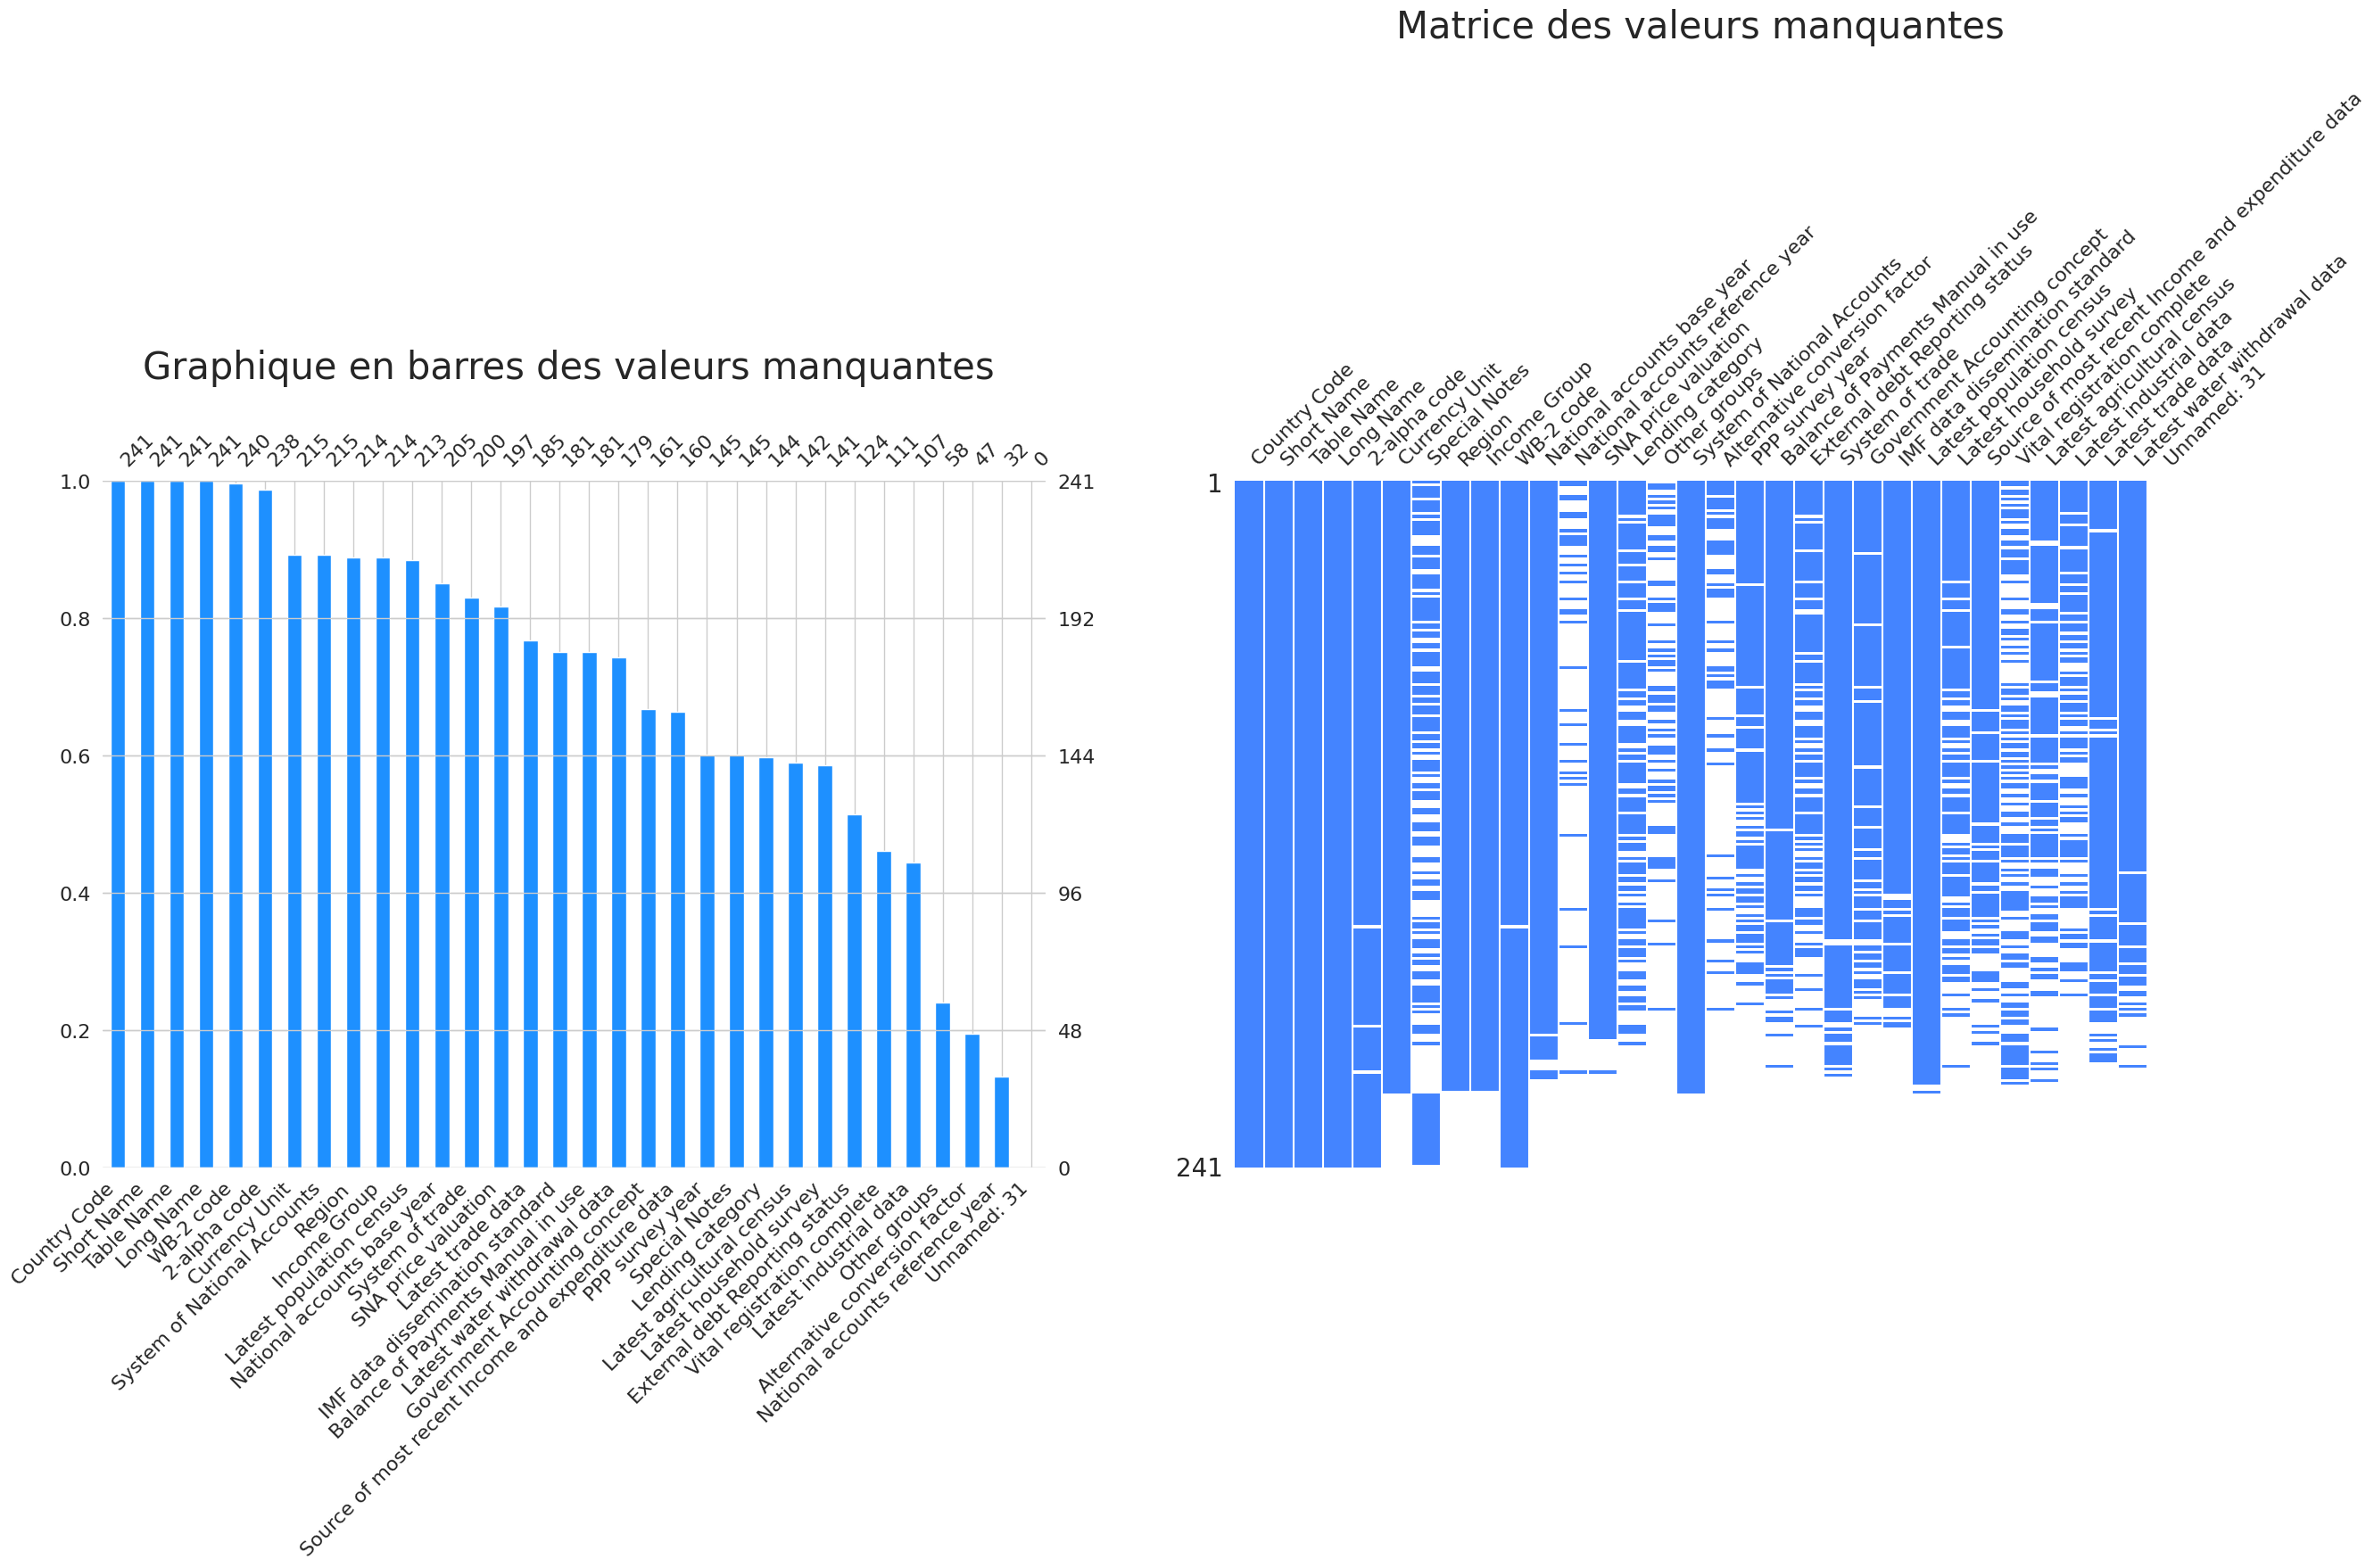

In [ ]:
# Valeurs manquantes

missing_values_count = country.isna().sum()
missing_values_percent = round(country.isna().mean() * 100, 0)
missing_data = pd.concat([missing_values_count, missing_values_percent], axis = 1)
missing_data.columns = ['NB', '%']
print("VALEURS MANQUANTES :\n", missing_data.sort_values(by = '%', ascending = False ), sep='', end='\n\n')


# Représentons graphiquement les données manquantes

f, axes = plt.subplots(1,2, figsize=(30, 10))

msno.bar(country,
         color="dodgerblue",
         sort="descending",
         ax = axes[0]
        ).set_title("Graphique en barres des valeurs manquantes \n", fontsize = 30)

msno.matrix(country,
            color=(0.27, 0.52, 1.0),
            sort="descending",
            sparkline = False,
            ax = axes[1]
           ).set_title("Matrice des valeurs manquantes \n", fontsize = 30)

- Le dataset contient 4 variables avec plus de 75% de données manquantes :
Unnamed: 31, National accounts reference year, Alternative conversion factor, Other groups

- Les variables des codes pays et des noms des pays sont complètes

- Enfin, il y a 11% de données manquantes pour les regions et les groupes économiques.

L'un des objectifs confiés par la start-up est de déterminer des ordres de grandeurs des indicateurs pour les différentes zones géographiques et pays du monde. Nous avons donc besoin des pays, des régions et des groupes économiques. Ces données ne présentant pas un nombre élevé de données manquantes, elles sont exploitables.

La selection des variables est la suivante :
- Country Code
- Short Name
- Region
- Income Group

Etudions les 11% de données manquantes pour les régions et les groupes économiques

In [ ]:
# L'analyse des données manquantes a montré qu'il manquait 11% des données de régions et de groupes économiques
# Nous allons vérifier s'il existe un lien entre les valeurs manquantes de ces 2 variables

region_count = country.loc[country['Region'] == 'NaN', 'Country Code'].count()
income_group_count = country.loc[country['Income Group'] == 'NaN', 'Country Code'].count()
both_count = country.loc[(country['Region'] == 'NaN') & (country['Income Group'] == 'NaN'), 'Country Code'].count()

if (region_count == income_group_count == both_count) :
  print("Quand la region vaut NaN, le groupe économique vaut NaN aussi")
else :
  print("Quand la region vaut NaN, le groupe économique ne vaut pas NaN ou vice versa")

Quand la region vaut NaN, le groupe économique vaut NaN aussi


In [ ]:
# Nous allons observer les pays concernés

print(country.loc[country['Region'] == 'NaN', 'Short Name'])

Series([], Name: Short Name, dtype: object)


Les valeurs manquantes sont déjà des aggrégats de données, ce qui explique pourquoi il y a des données manquantes pour ces variables.

In [ ]:
# Doublons

duplicates = country.duplicated(subset = None)
per_duplicates = percentage_isna(duplicates)
print("% DE DOUBLONS :", per_duplicates, sep='', end='\n\n')

% DE DOUBLONS :0.0



Aucun doublon dans le dataset

Dans la suite :
- Nous allons regrouper les pays selon leur groupe d'appartenance
  - Selon la région dans un premier temps
  - Selon le groupe d'appartenance dans un second temps
  - En affichant les 2 précédents graphiques dans le même graphique


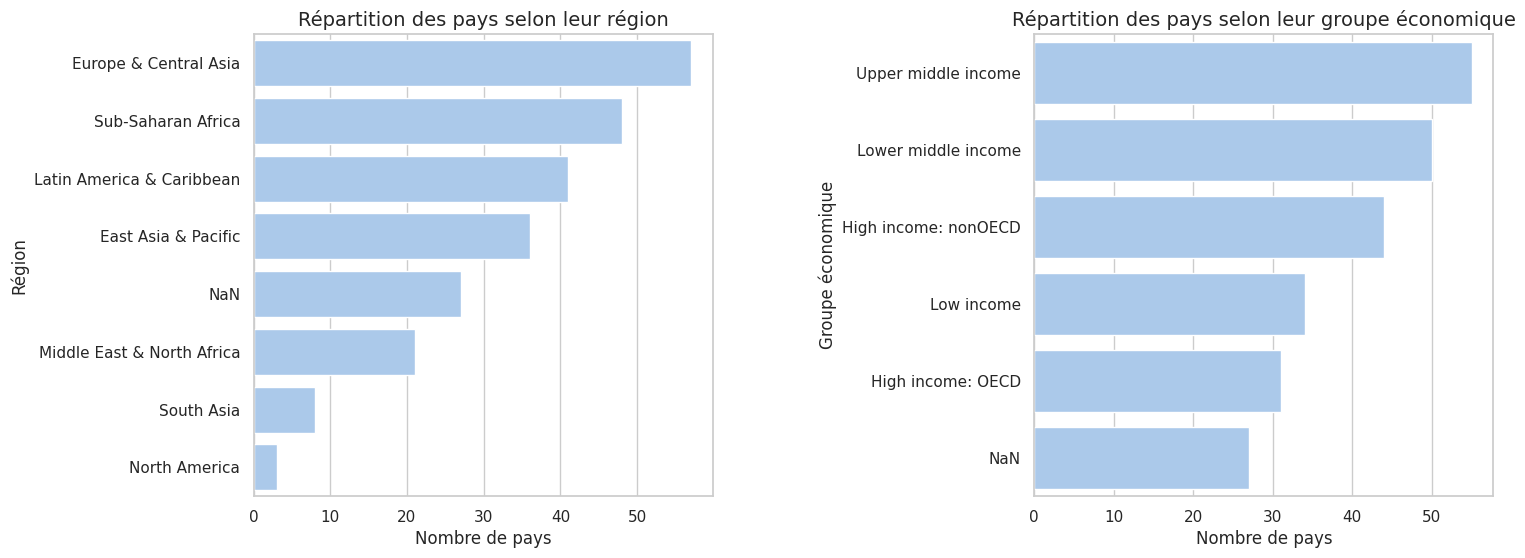

In [ ]:
# Inclure les valeurs manquantes pour avoir tous les pays

country['Region'] = country['Region'].fillna('NaN')
country['Income Group'] = country['Income Group'].fillna('NaN')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Premier graphique - Régions

regions_sorted = country.groupby('Region').count().sort_values(by=['Country Code'], ascending = False)
regions_sorted.reset_index(inplace = True)
sns.barplot(data=regions_sorted, y = 'Region', x = 'Country Code', ax = axes[0])
axes[0].set_xlabel("Nombre de pays", fontsize = 12)
axes[0].set_ylabel("Région", fontsize = 12)
axes[0].set_title("Répartition des pays selon leur région", fontsize = 14)

# Deuxième graphique - Groupes de revenus

group_sorted = country.groupby('Income Group').count().sort_values(by=['Country Code'], ascending = False)
group_sorted.reset_index(inplace = True)
sns.barplot(data=group_sorted, y = 'Income Group', x = 'Country Code', ax = axes[1])
axes[1].set_xlabel("Nombre de pays", fontsize = 12)
axes[1].set_ylabel("Groupe économique", fontsize = 12)
axes[1].set_title("Répartition des pays selon leur groupe économique", fontsize = 14)

plt.subplots_adjust(wspace = 0.7)
plt.show()

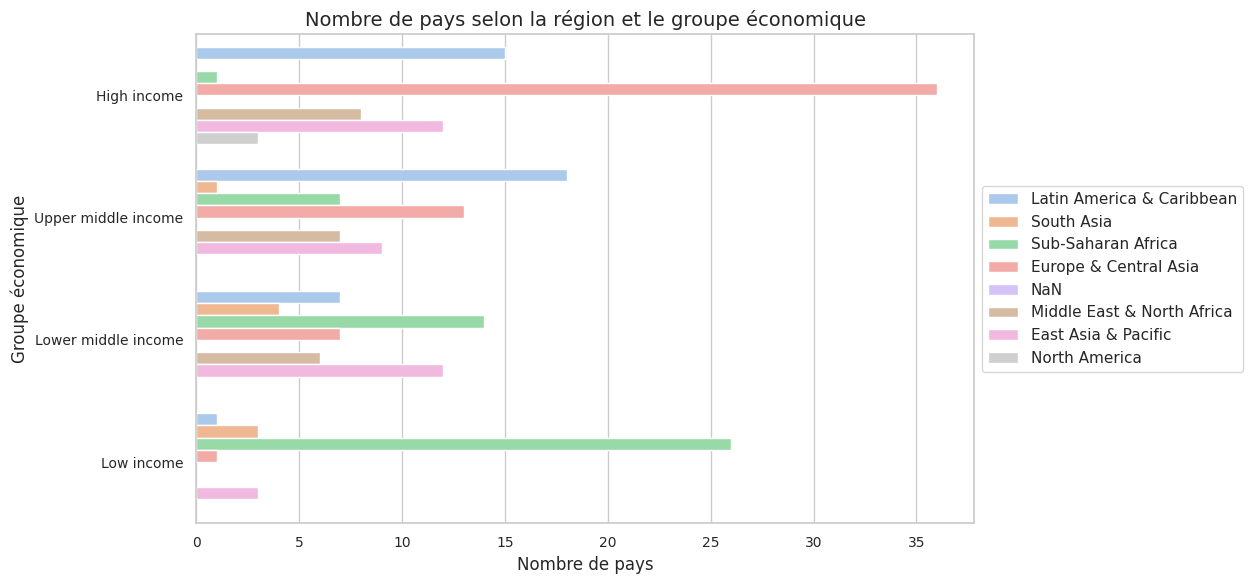

In [ ]:
# Regrouper les pays High income: OECD et High income: NonOECD en High income

country_one_high_income = country
country_one_high_income.loc[((country_one_high_income['Income Group'] == 'High income: OECD') | (country_one_high_income['Income Group'] == 'High income: nonOECD')), 'Income Group'] = 'High income'


# 3e représentation graphique : Région et Groupes de revenus
plt.figure(figsize = (10,6))

sns.countplot(y = 'Income Group', hue = 'Region', data = country_one_high_income, orient = 'h',
                   order=['High income', 'Upper middle income', 'Lower middle income', 'Low income'])

plt.xlabel("Nombre de pays", fontsize = 12)
plt.ylabel("Groupe économique", fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Nombre de pays selon la région et le groupe économique", fontsize = 14)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Graphique sur la répartition des pays selon les régions** :

4 zones géographiques comptent plus de 35 pays. Ce sont : L'Europe et l'Asie Centrale, l'Afrique subsaharienne, l'Amérique Latine et les Caraïbes et enfin L'Asie de l'Est et le Pacifique.

L'Amérique du Nord ne compte que 3 pays, les Bermudes, le Canada et les Etats-Unis.

A priori, la répartition des pays dans les zones géographiques est logique. En effet, les continent dont le découpage des pays et plus fin comme l'Europe qui comptent davantage de pays que l'Amérique du Nord dont la superficie des pays est plus grande.

A cause de la différence de superficie et de l'absence d'indication de la richesse du pays, il est difficile de tirer plus d'informations sur ce graphique.

---

**Graphique sur la répartition des pays selon les groupes économiques** :

Les 5 groupes économiques sont bien représentés, chaque groupe compte entre 30 et 60 pays. Néanmois, en regroupant les pays appartenant aux groupes 'High income: OECD' et 'High income: nonOECD, le groupe économique obtenu compte le plus de pays et présente le plus de potentiel (High Income) ce qui est prometteur pour la suite.

---

**Graphique sur la répartition des pays selon les régions et les groupes économiques** :

Le graphique ci-dessous regroupe les informations présentées précédemment.
Il permet de regarder dans un groupe économique donnée, la répartition régionale des pays.

Sans surprise, dans le groupe économique High Income, ce sont les régions du monde où les pays sont les plus développés et en forte croissance qui sont majoritaire, dont l'Europe et l'Asie centrale, l'Amérique Latine et le Caraïbes etl'Amérique du nord.

Alors qu'on observe deux tendances inverse :
- Plus le groupe économique a un revenu élevé, plus il y a de pays de la région de l'Europe et de l'Asie centrale
- A l'inverse, Plus le groupe économique a un revenu élevé, moins il y a de pays de la région de l'Afrique Subsaharienne  

Enfin les pays de l'Amérique Latine et de Caraïbes semblent être des pays prometteurs, mais il est impossible de s'avancer davantage à ce stade.


**Bilan**

Il n'y a aucun doublon mais il y a des valeurs manquantes. Néanmoins, le dataset est complètement exploitable.
En effet, les variables intéressantes sont complètes à savoir le code du pays, le nom du pays et les groupes d'appartenance dont la donnée est complète pour chaque pays.

L'Europe et l'Asie Centrale, l'Amérique Latine et les Caraïbes, et L'Amérique du Nord sont des régions à fort potentiel au vue de leur nombre et de leur appartenance à des groupes économiques dont le revenu est haut.



## D. Dataset Data

VALEURS MANQUANTES :
                    NB      %
Unnamed: 69     886930  100.0
2017            886787  100.0
2016            870470   98.0
1978            849354   96.0
1989            849390   96.0
...                ...    ...
2010            644488   73.0
Country Code         0    0.0
Indicator Code       0    0.0
Indicator Name       0    0.0
Country Name         0    0.0

[70 rows x 2 columns]



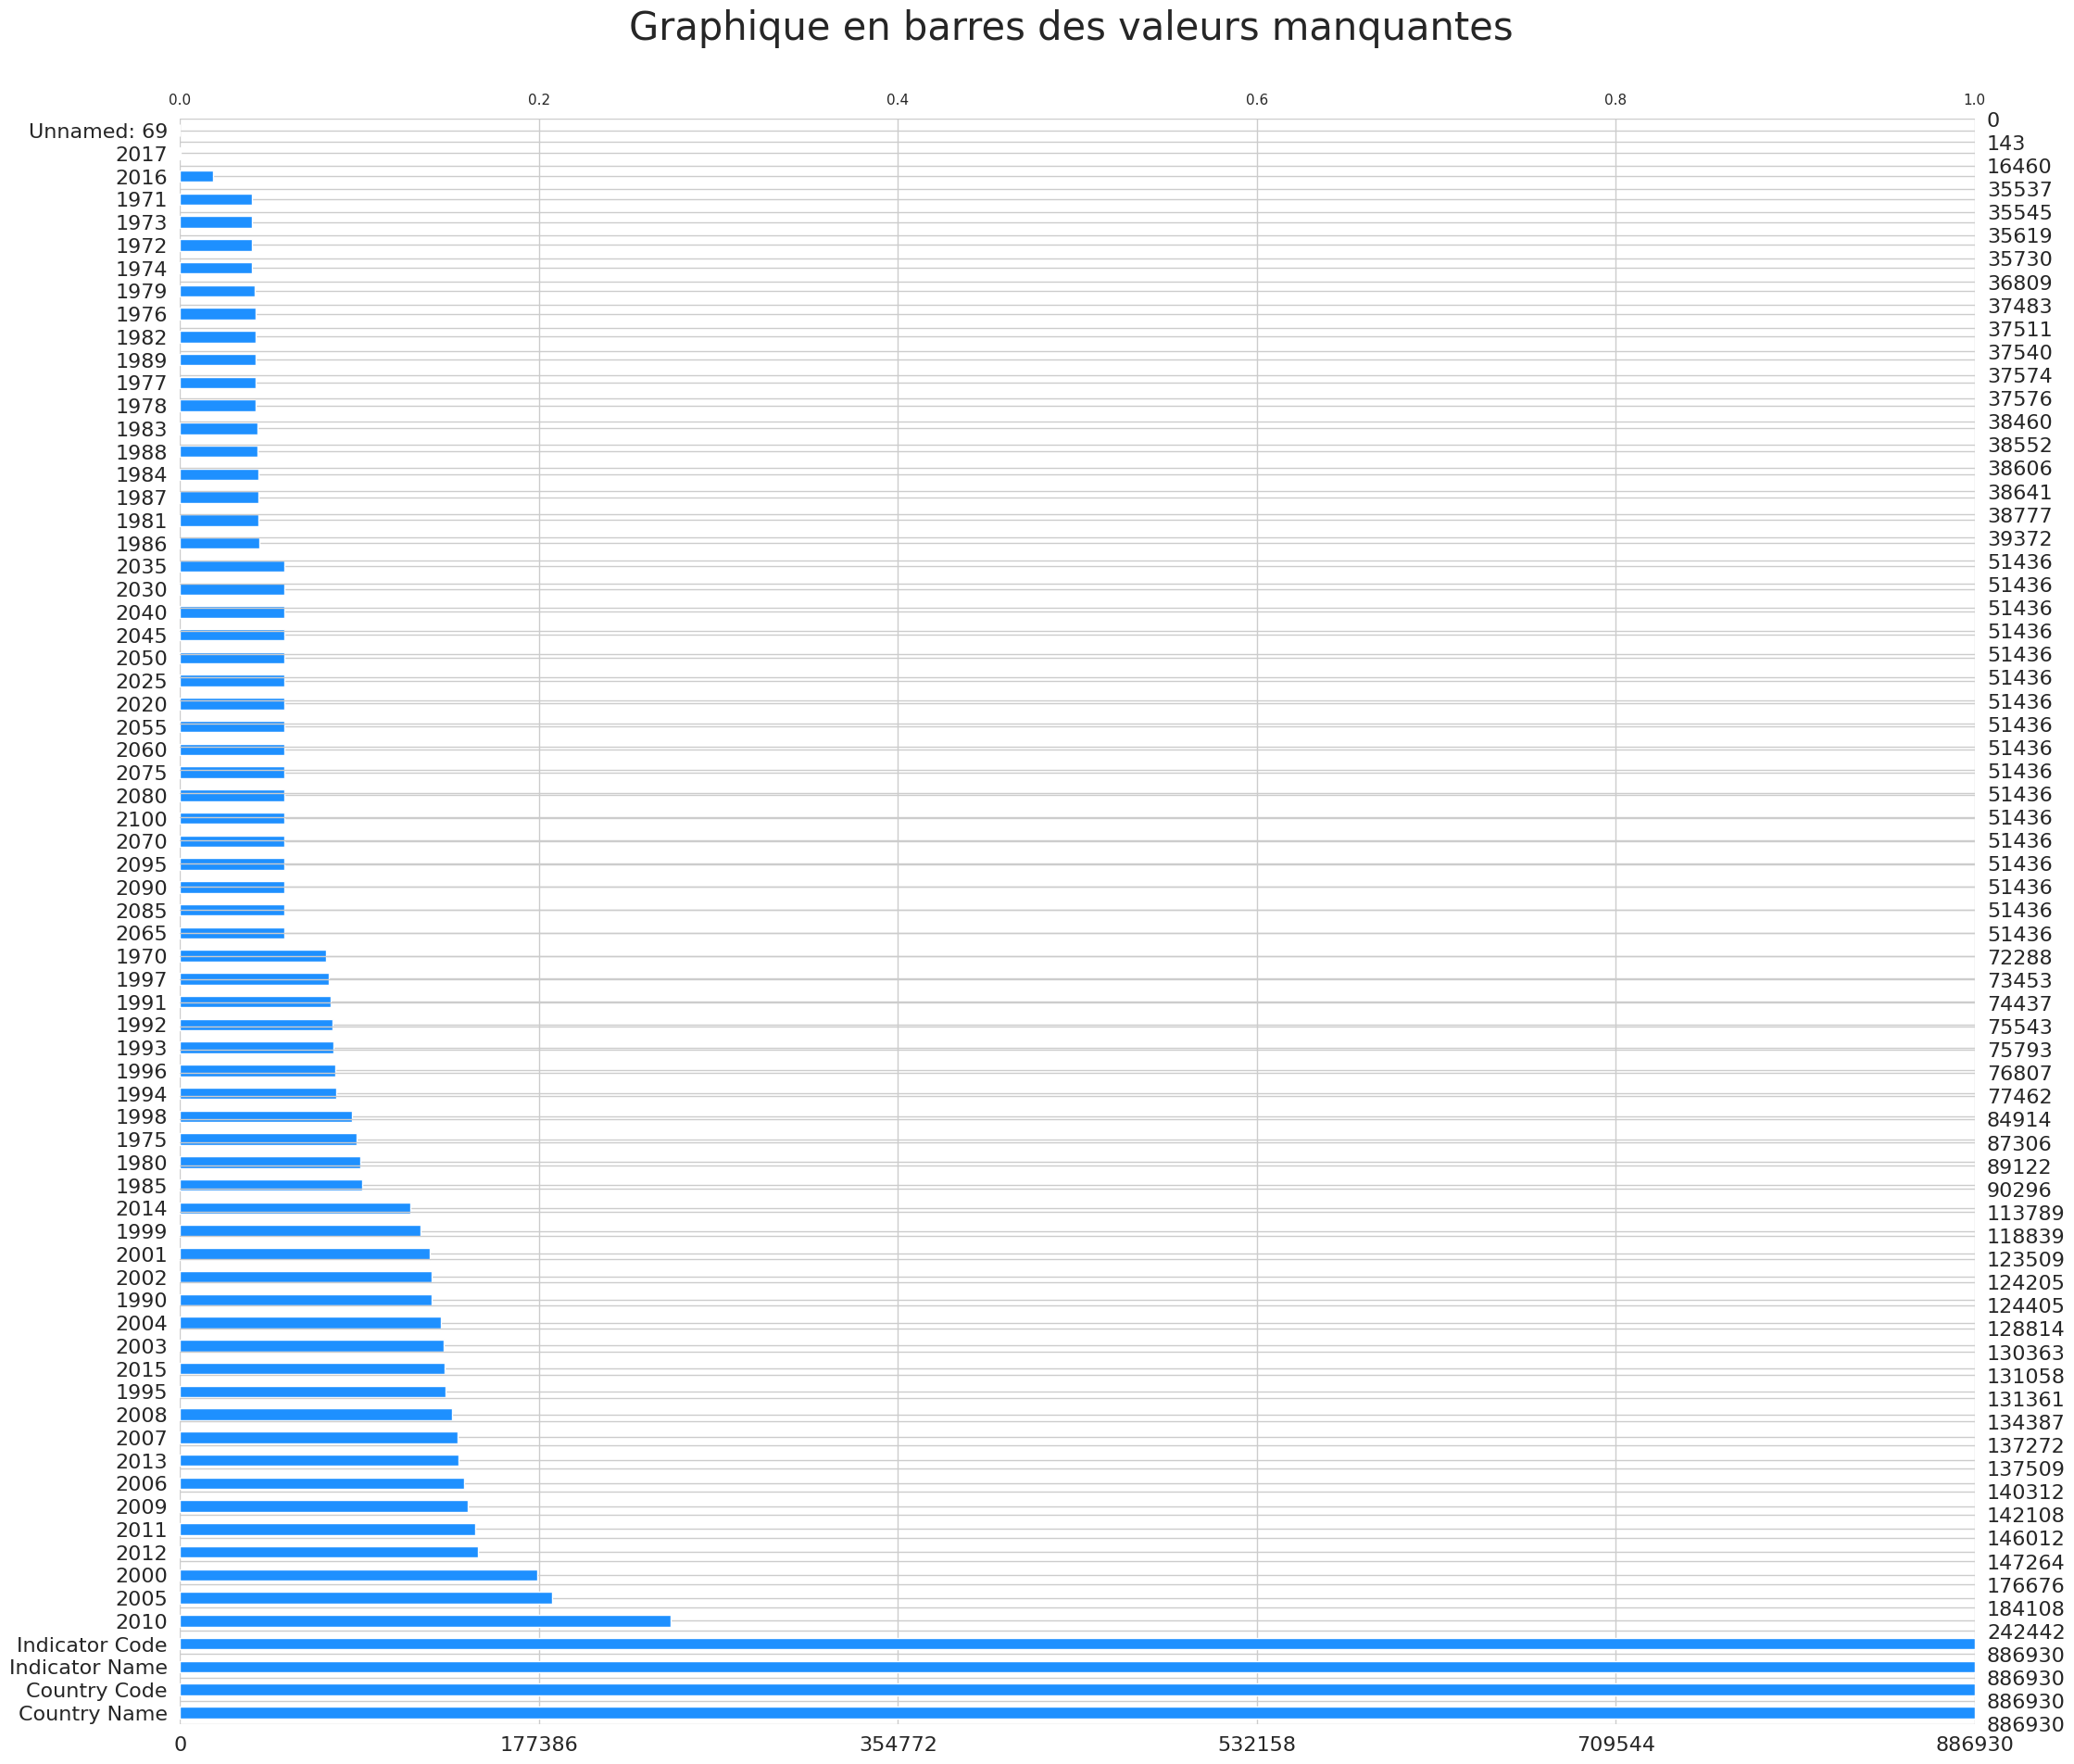

In [ ]:
# Valeurs manquantes

missing_values_count = data.isna().sum()
missing_values_percent = round(data.isna().mean() * 100, 0)
missing_data = pd.concat([missing_values_count, missing_values_percent], axis = 1)
missing_data.columns = ['NB', '%']
print("VALEURS MANQUANTES :\n", missing_data.sort_values(by = '%', ascending = False ), sep = '', end = '\n\n')


# Représentons graphiquement les données manquantes

plt.figure(figsize=(30, 10))
msno.bar(data,
         color="dodgerblue",
         sort="descending",
        ).set_title("Graphique en barres des valeurs manquantes \n", fontsize = 30)
plt.show()


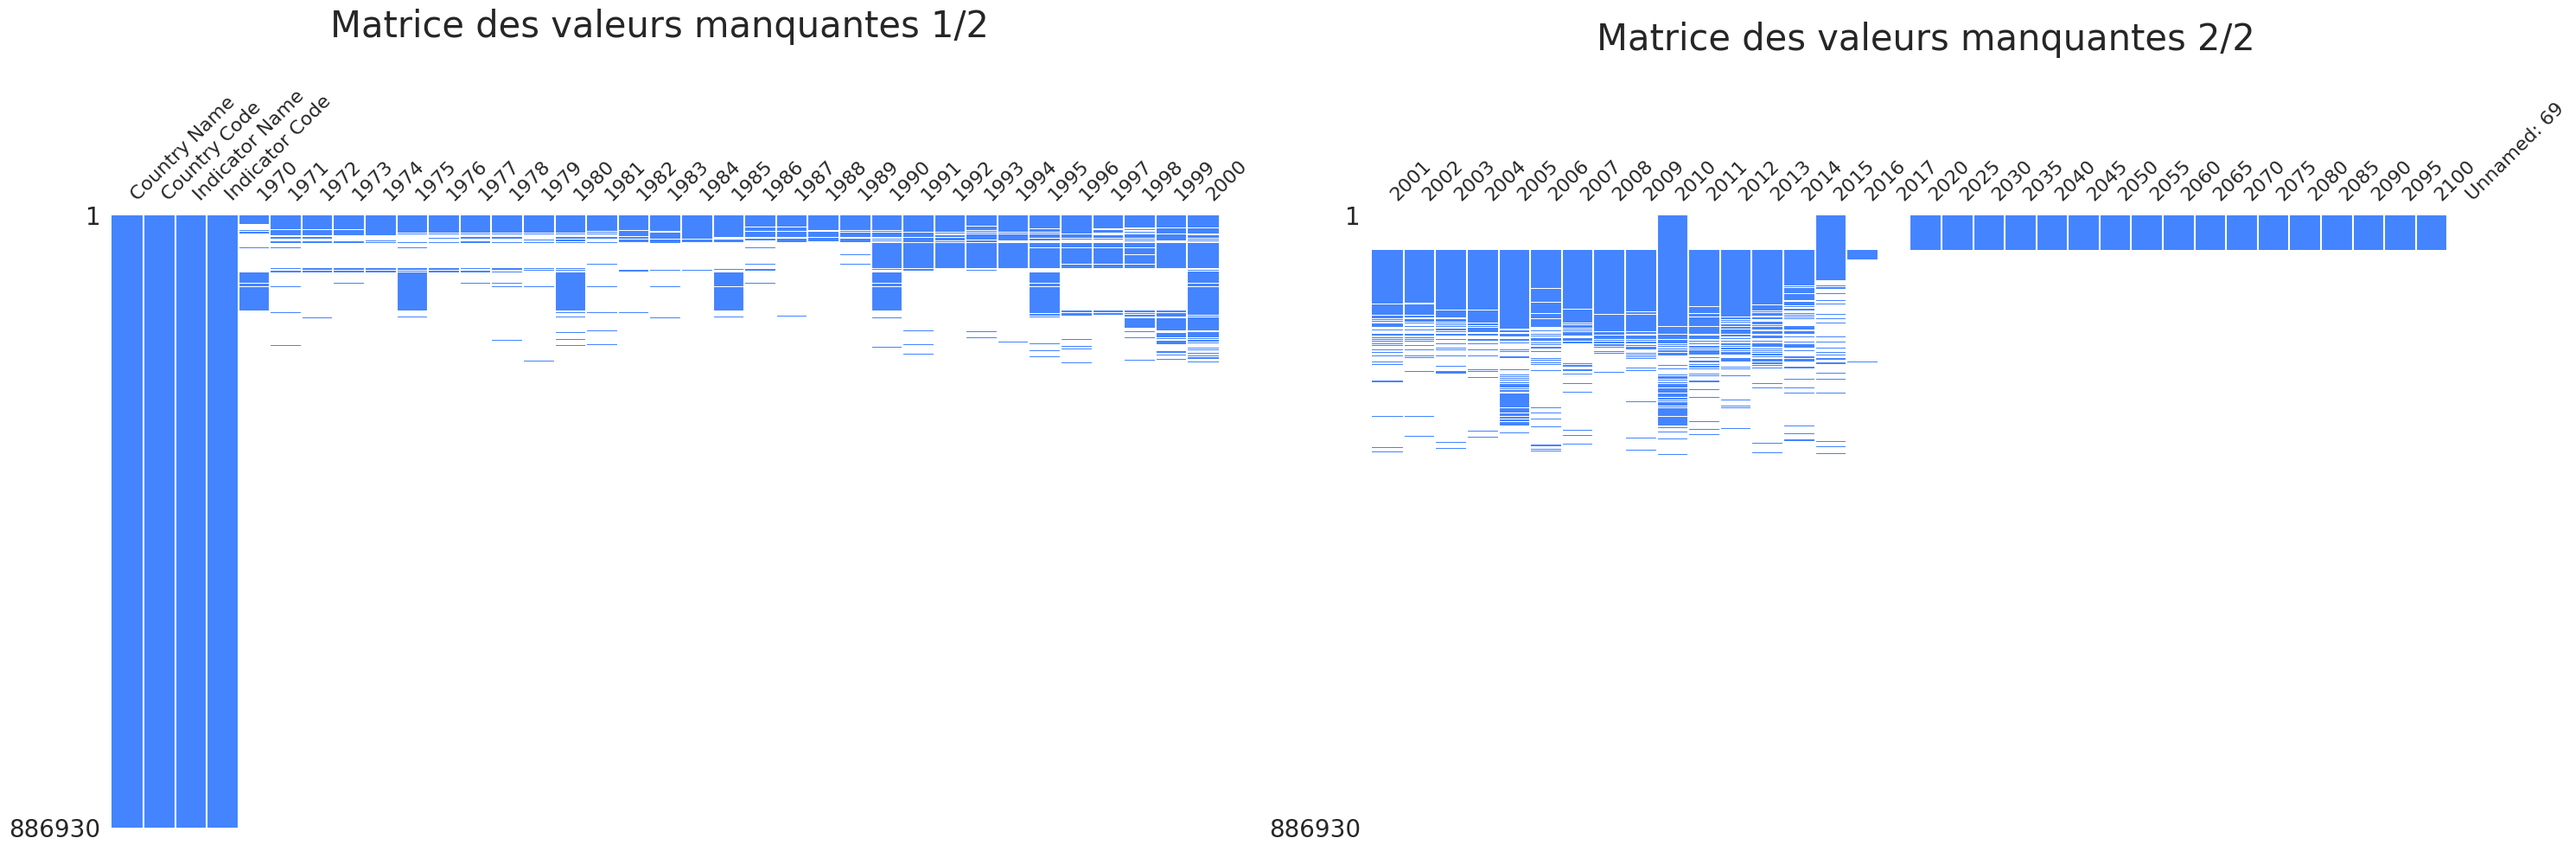

In [ ]:
f, axes = plt.subplots(1,2, figsize=(30, 10))
f.subplots_adjust(wspace=0.3)

msno.matrix(data.iloc[:, :35],
         color=(0.27, 0.52, 1.0),
         sort="descending",
         sparkline = False,
         ax = axes[0]
        ).set_title("Matrice des valeurs manquantes 1/2 \n", fontsize = 30)

msno.matrix(data.iloc[:, 35:],
            color=(0.27, 0.52, 1.0),
            sort="descending",
            sparkline = False,
            ax = axes[1]
           ).set_title("Matrice des valeurs manquantes 2/2\n", fontsize = 30)

plt.tight_layout()
plt.show()


Les données essentielles à savoir le code pays, le nom du pays, le nom de l'indicateur et le code de l'indicateur sont complètes.

En revanche, concernant la donnée sur les différentes années, il manque plus de 73% des données pour chaque année. Néanmoins, ce résultat est à mettre en perspective car le dataset contient 886930 eregistrements. En effet, si on prendre 2016 qui a 98% de données manquantes, il reste 16 460 eregistrements disponibles.

La colonne 2017 ne contient que 143 enregistrements. En comparaison avec 2016, les données sont trop peu nombreuses pour être exploitées.

---

**SELECTION DES VARIABLES** :

Notre objectif est de déterminer les pays ayant le plus de potentiel pour la start-up :
- Nous avons donc besoin des données les plus récentes. Une donnée datant de plus de 10 ans par exemple est peu pertinente.

=> On ne prendra pas en compte les données avant 2010
- De plus, les données prévisionnelles ne sont pas pertinentes pour déterminer le potentiel d'un pays car elles sont par définition prévisionnelles. Sans oublier qu'il y a des données manquantes.

Le graphique des valeurs manquantes manque de précision sur le nombre de données disponible pour une année donnée car l'échelle s'adapte aux variables dont les données sont complètes. De plus, il est organisé selon le nombre de valeurs décroissants, ce qui rend difficilement comparables les valeurs disponibles pour des années consécutives.

Traçons un graphique sur les données disponibles selon l'année.

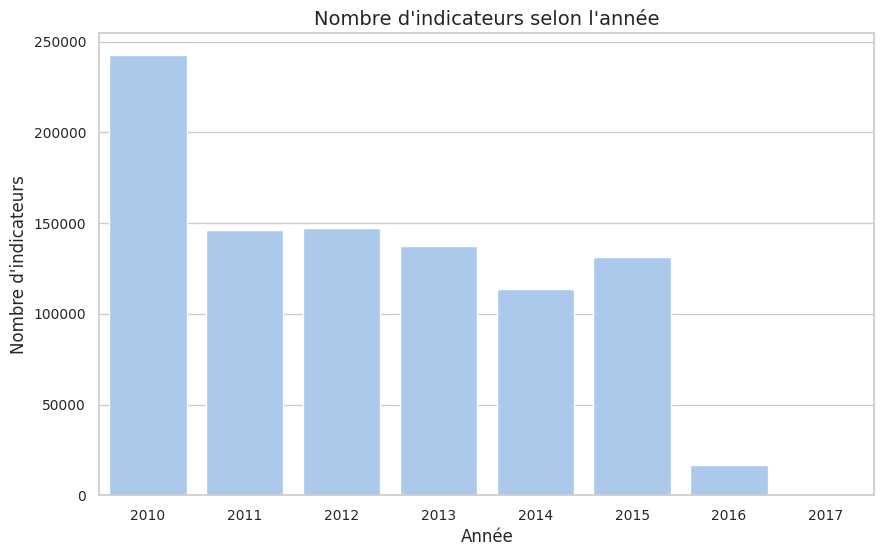

In [ ]:
# Représentons graphiquement le nombre d'enregistrements disponibles par an

plt.figure(figsize=(10, 6))

sns.set_theme(style='whitegrid', palette='pastel')
group_indicator = data.loc[:, ['Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].groupby('Indicator Code').count()

total = group_indicator.sum() # output.serie/scalar
total = pd.DataFrame(total).reset_index().rename(columns={'index': 'Year', 0: 'Total'})
sns.barplot(data = total, x='Year', y = 'Total')

plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'indicateurs", fontsize=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Nombre d'indicateurs selon l'année", fontsize=14)

plt.show()

Nous observons une stabilité entre 2011 et 2015 sur le nombre de données enregistrées

Il n'y a aucune donnée concernant 2017. Il n'est pas nécessaire de conserver cette colonne.

Pour la partie d'analyse, le choix des données s'effectuera en fonction de la donnée la plus récente.
Puisque 2016 contient peu de données en comparaison 4 années précédentes, et que le nombre de données disponibles entre 2011 et 2015 est assez stable, 2016 ne sera pas pris en compte pour la suite de l'étude.

In [ ]:
# Doublons
duplicates = data.duplicated(subset = ['Country Code', 'Indicator Code'])
per_duplicates = percentage_isna(duplicates)
print("% DE DOUBLONS (VARIABLES : ['Country Code', 'Indicator Code']): ", per_duplicates, sep='', end='\n\n')

% DE DOUBLONS (VARIABLES : ['Country Code', 'Indicator Code']): 0.0



Il n'y a aucun doublon.

**Bilan**

Malgré plus de 73% de données manquantes pour toutes les variables d'années, nous avons suffisamment de données sur les années les plus récentes pour étudier les indicateurs entre 2011 et 2015.


## E. Dataset Series

NOMBRE DE VALEURS MANQUANTES :
                                       NB      %
Limitations and exceptions           3651  100.0
Notes from original source           3665  100.0
License Type                         3665  100.0
Related indicators                   3665  100.0
Other web links                      3665  100.0
Development relevance                3662  100.0
General comments                     3651  100.0
Unnamed: 20                          3665  100.0
Unit of measure                      3665  100.0
Aggregation method                   3618   99.0
Statistical concept and methodology  3642   99.0
Periodicity                          3566   97.0
Related source links                 3450   94.0
Base Period                          3351   91.0
Other notes                          3113   85.0
Short definition                     1509   41.0
Topic                                   0    0.0
Source                                  0    0.0
Long definition                       

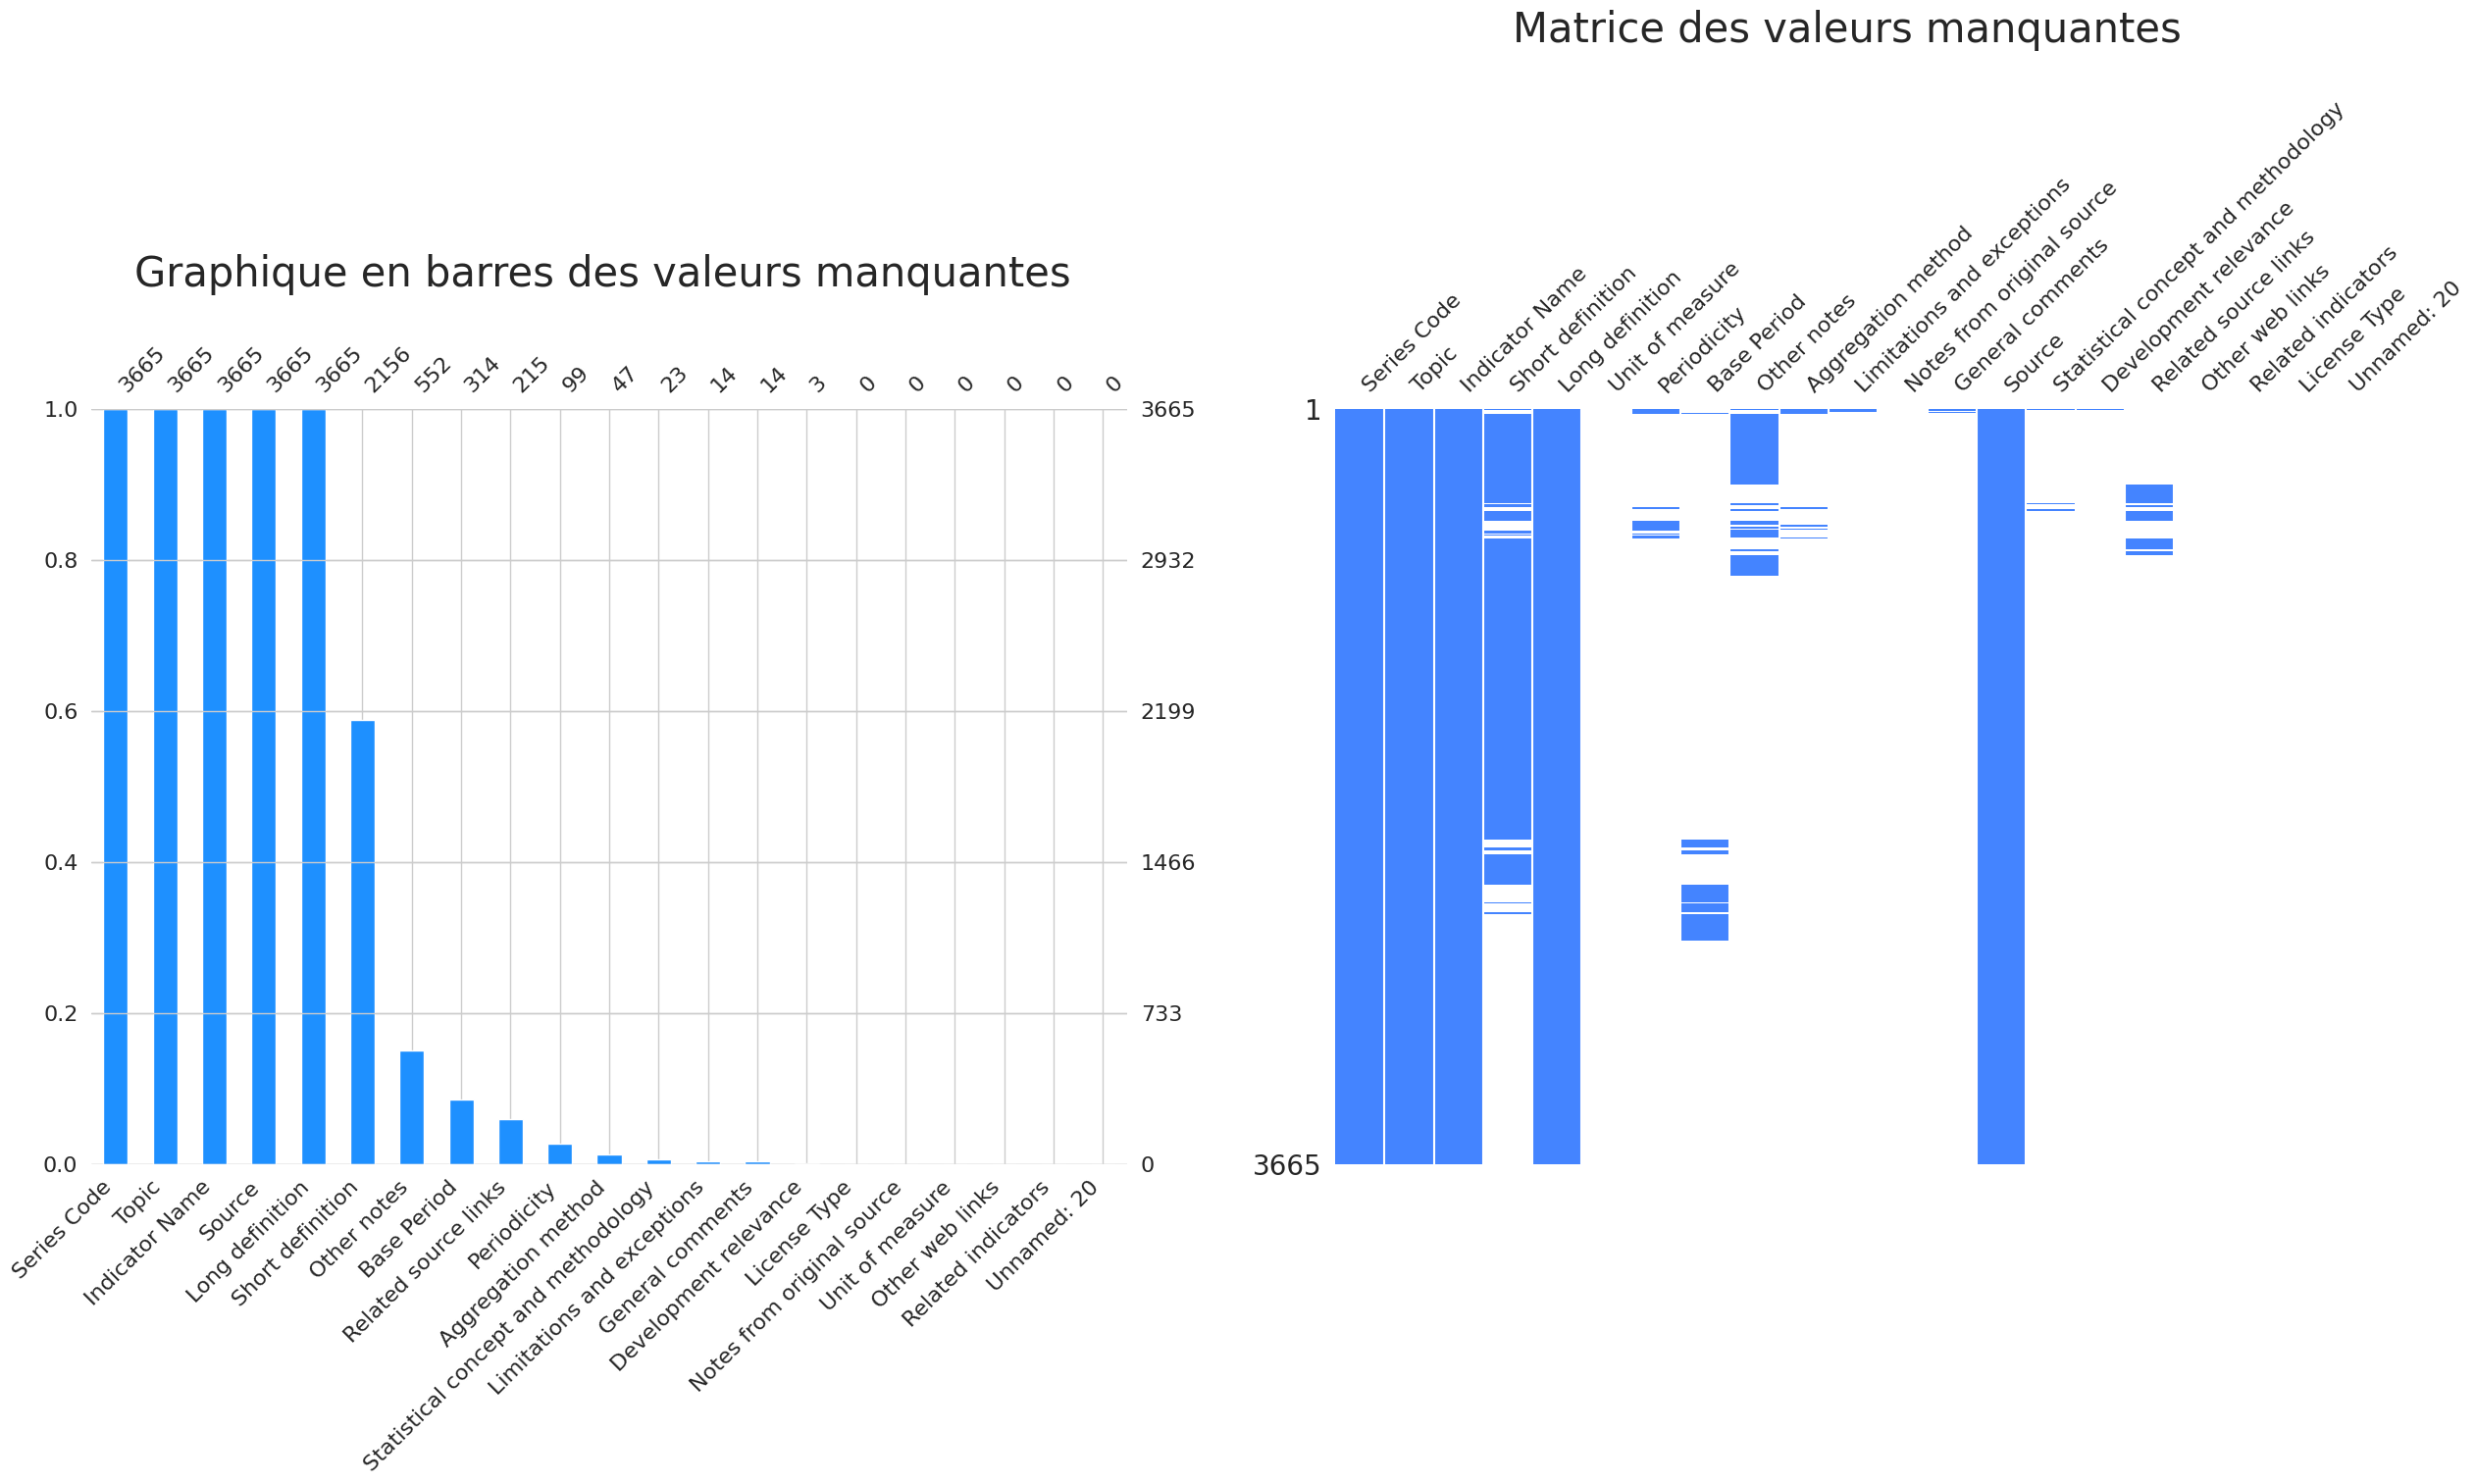

In [ ]:
# Valeurs manquantes

missing_values_count = series.isna().sum()
missing_values_percent = round(series.isna().mean() * 100, 0)
missing_series = pd.concat([missing_values_count, missing_values_percent], axis=1)
missing_series.columns = ['NB', '%']
print("NOMBRE DE VALEURS MANQUANTES :\n", missing_series.sort_values(by = '%', ascending = False ), sep='', end='\n\n')

# Représentons graphiquement les données manquantes

f, axes = plt.subplots(1,2, figsize=(30, 10))

msno.bar(series,
         color="dodgerblue",
         sort="descending",
         ax = axes[0]
        ).set_title("Graphique en barres des valeurs manquantes \n", fontsize = 30)

msno.matrix(series,
            color=(0.27, 0.52, 1.0),
            sort="descending",
            sparkline = False,
            ax = axes[1]
           ).set_title("Matrice des valeurs manquantes \n", fontsize = 30)

plt.show()


Sur les 21 variables, 15 ont un taux de données manquantes supérieur à 85%. De plus, elles sont peu pertinentes pour notre étude.
Sur les 5 restantes, la variable 'Short definition' est une redondance de la variable 'Long definition'.

En définitive, 4 variables sont exploitables dans ce jeu de données, dont 3 qui sont les plus importantes puisqu'elles donne le nom de l'indicateur, sa définition, son code (série), et son thème.  

La variable 'source', ne présente pas d'intérêt dans notre étude.

In [ ]:
# Doublons
duplicates = series.duplicated(subset = None)
per_duplicates = percentage_isna(duplicates)
print("% DE DOUBLONS :", per_duplicates, sep='', end='\n\n')

% DE DOUBLONS :0.0



Pour simplifier la sélection des indicateurs, une première manière de filtrer est de regarder les différents thèmes de ces derniers.

Représentons graphiquement les thèmes des indicateurs.

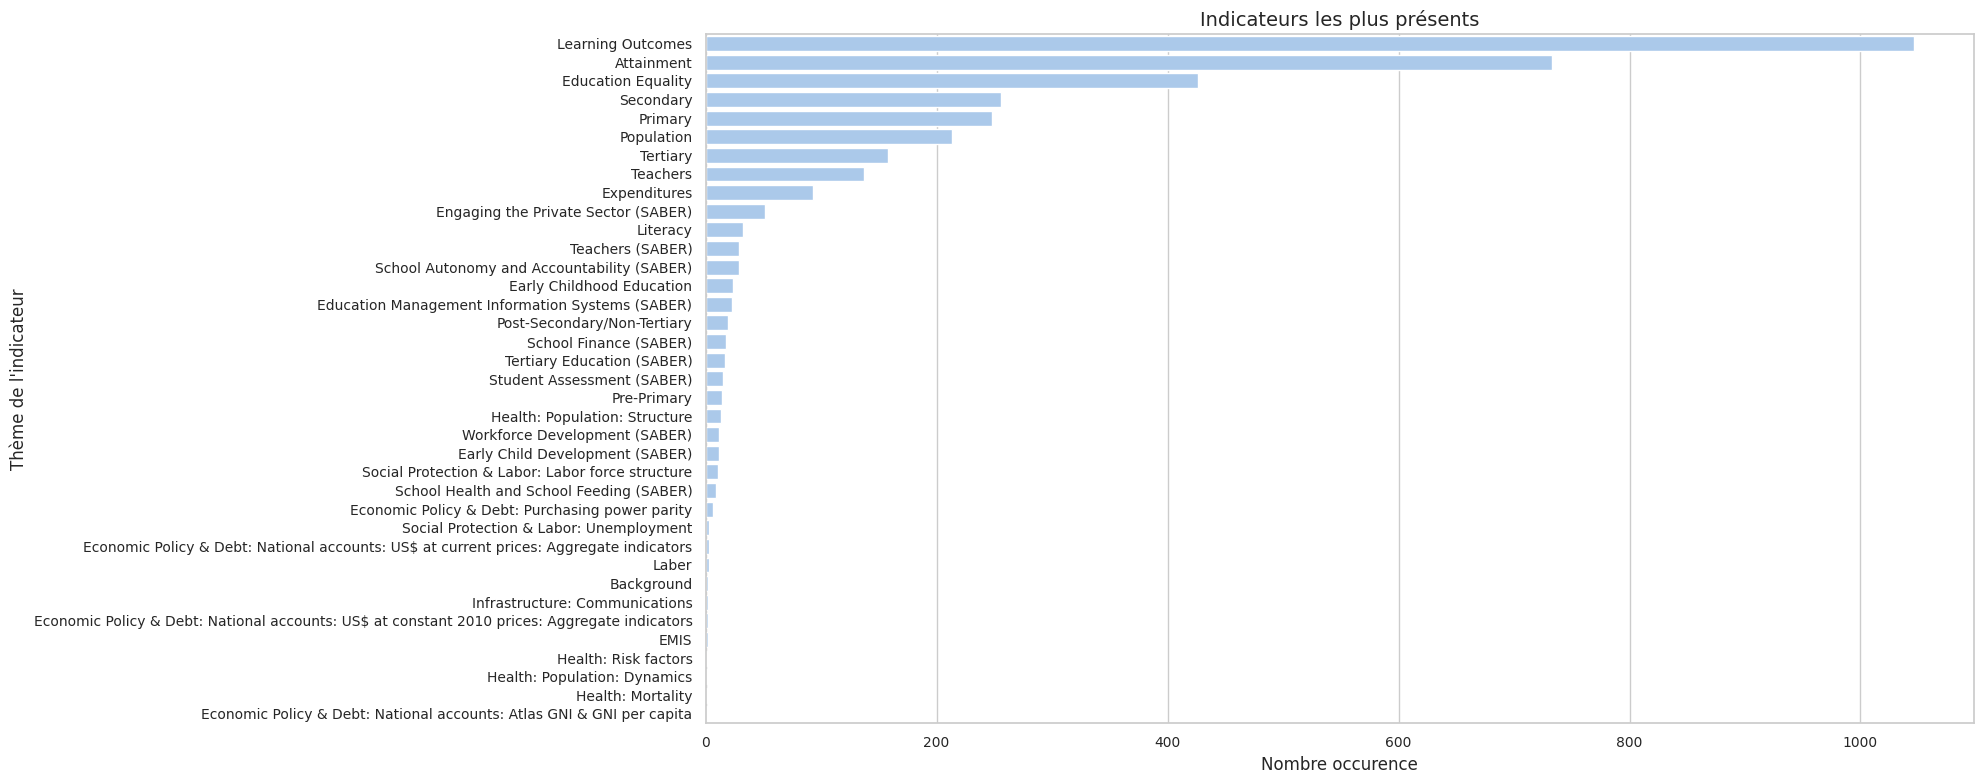

In [ ]:
plt.figure(figsize=(20,8))
sns.set_theme(style='whitegrid', palette='pastel')

series_ordered = series.loc[:, ['Topic', 'Series Code']].groupby('Topic').count().reset_index().sort_values(by = 'Series Code', ascending = False)
sns.barplot(data = series_ordered, y = 'Topic', x = 'Series Code')

plt.xlabel("Nombre occurence", fontsize=12)
plt.ylabel("Thème de l'indicateur", fontsize=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Indicateurs les plus présents", fontsize=14)
plt.tight_layout()

plt.show()

Graphiquement, les 2 thèmes Learning Outcome et Attainment sortent du lot et globalement 9 thèmes sont exploitables pour la suite de notre étude.

**Bilan**

Les variables intéressantes dans le dataset series sont les informations intrinsèques aux séries (dont le nom, le code, la description) et Topic qui permet de catégoriser les différents indicateurs.

In [ ]:
print(country.columns.to_list())

['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']


## Bilan général

Pour simplifier les datasets et les exploiter, nous avons conservé les données les plus pertinentes dont la qualité est suffisante.

Voici la selection des variables par dataset :
- series : 'Series Code', 'Topic', 'Indicator Name', 'Long definition'  
- data :'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015'
- country: 'Country Code', 'Short Name', 'Long Name', 'Region', 'Income Group'
- country series et foot note : aucune variable retenue

Dans l'ensemble, malgré des données manquantes, celles-ci sont soient négligeables (car non utiles pour notre étude), soit celles-ci sont suffisamment nombreuses pour être exploitables (comme les colonnes dates du dataset data)

In [ ]:
# Mise à jour des données

series = series.loc[:, ['Series Code', 'Topic', 'Indicator Name', 'Long definition']]
data = data.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015']]
country = country.loc[:, ['Country Code', 'Short Name', 'Long Name', 'Region', 'Income Group']]

# V. Nettoyage et Filtrage pour le choix des variables définitives ok


Nous allons sélectionner les années de 2010 à 2015.
Dans un premier temps, nous identifierons les indicateurs pertinents pour notre étude de marché.

Les contenues sont des formation en ligne pour un public de niveau lycée et université.

[LIMITANT]

Il nous faut un indicateur sur les infrastructures disponibles pour vérifier si elles ne sont pas limitants.


[NOMBRE POTENTIEL DE CLIENT *2]

Nous allons également cibler les jeunes entre 15 et 18 ans et également entre 18 et 24 ans. Voyons si nous avons un indicateur sur ce point. un indicateur sur la population.

[SAVOIR SI LA POPULATION A LES MOYENS]
Il nous faut également déterminer si les personnes ont les moyens d'investir dans une formation. On peut s'appuyer sur le PIB? Sur c X Z.

In [ ]:
# Choisissons les indicateurs en fonction du nom de l'indicateur
# a décommenter

# group_series = series['Topic'].unique()

# for topic in group_series:
#   group_long_def = series.loc[series['Topic'] == topic, 'Indicator Name'].unique()
#   print(topic, end='\n\n')
#   print(group_long_def, end='\n\n\n\n\n\n')

Tous les indicateurs dans leur catégorie (ou 'Topic') respective ont été affichés.

Pour le choix des indicateurs, je vais donner le contexte du projet.
Ce travail vise à aider une startup de Edtech à déterminer une liste de pays cibles pour développer leur portefeuille client.

Les produits de l'Edtech sont des formations et à destination d'une population de jeunes entre 15 et 24 ans.

Pour une analyse globale, j'ai choisi d'étudier un groupe soit les jeunes entre 15 et 24 ans et non de manière séparée entre 15-18 puis 18-24 ans.
Le premier indicateur choisi est :

 **Population**
 - Population, ages 15-24, total

Outre la population, il faut savoir si c'est un pays il a de la demande.

**Education dans le secondaire et dans le tertiaire**

 - 'Enrolment in secondary education, both sexes (number)'
 - 'Enrolment in tertiary education, all programmes, both sexes (number)'

Ensuite, il faut s'assurer que la population ciblée dans un pays ait les moyens d'acheter le produit. Le produit intérieur brut basé sur la parité de pouvoir d'achat est l'indicateur permet de comparer le pouvoir d'achat entre les pays.
J'ai choisi donc l'indicateur économique :

**Economie**
- 'GDP, PPP (current international $)'

Ensuite, les formations étant disposé en ligne, il faut les cibles potentielles possèdent des ressources numériques nécessaires pour accéder au service proposé.
Voici 2 idées d'indicateurs

**Infrastructure: Communications**
- 'Personal computers (per 100 people)'
- 'Internet users (per 100 people)'

Regardons la description longue de ces indicateurs

Lisons la description des indicateurs :

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

chosen_indicator_name = ['Personal computers (per 100 people)',
'Internet users (per 100 people)',
'GDP, PPP (current international $)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Enrolment in secondary education, both sexes (number)',
'Population, ages 15-24, total']

chosen_indicator_code = []
for ind in chosen_indicator_name:
  # print(data.loc[data['Indicator Name'] == ind, 'Indicator Code'].unique())
  chosen_indicator_code.extend(data.loc[data['Indicator Name'] == ind, 'Indicator Code'].unique())

indicator_def = series.loc[series['Indicator Name'].isin(chosen_indicator_name), ['Indicator Name', 'Long definition']]
indicator_def.style.set_properties(**{'text-align': 'left'})
print(indicator_def['Long definition'])
print(chosen_indicator_code)

610     Personal computers are self-contained computer...
611     Internet users are individuals who have used t...
1660    PPP GDP is gross domestic product converted to...
2294    Total number of students enrolled at public an...
2332    The total number of students enrolled at publi...
2506    Population, ages 15-24, total is the total pop...
Name: Long definition, dtype: object
['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.PP.CD', 'SE.TER.ENRL', 'SE.SEC.ENRL', 'SP.POP.1524.TO.UN']


Au vue de la long définition de l'indicateur Internet users (per 100 people) qui mentionne que cela est pris en compte pour des machines de jeu, des télévisions etc. et sur une période de 3 mois, je vais favoriser l'indicateur 'Personal computers (per 100 people)' par rapport à 'Internet users (per 100 people)'

L'analyse sur la qualité des datasets s'est conclue en l'analyse des données entre 2010 et 2015.

Nous allons maintenant fusionner les données pour que toutes les informations soient disponibles dans un même dataframe

## Fusion des datasets et vérification de la présence de données pour les indicateurs


In [ ]:
#pd.reset_option('all')
mask_coldata = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015']
mask_colcountry = ['Country Code', 'Region'] #, 'Income Group', 'Other groups'
mask_colseries = ['Series Code', 'Topic', 'Long definition']

working_df = data.loc[data['Indicator Code'].isin(chosen_indicator_code), mask_coldata]
working_df = pd.merge(working_df, country[mask_colcountry], left_on='Country Code', right_on='Country Code', how = 'left')
working_df = pd.merge(working_df, series[mask_colseries], left_on='Indicator Code', right_on='Series Code', how = 'left').drop(columns = 'Series Code')

#Dimension
nRow, nCol  = working_df.shape
print("NB DE LIGNES   :", nRow)
print("NB DE COLONNES :", nCol, end ='\n\n')

# Nom des colonnes
print("LISTE DES COLONNES :", working_df.columns.to_list(), end='\n\n')

NB DE LIGNES   : 1452
NB DE COLONNES : 13

LISTE DES COLONNES : ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', 'Region', 'Topic', 'Long definition']



In [ ]:
# Valeurs manquantes par indicateur

years = ['2015', '2014', '2013', '2012', '2011', '2010']

for indicator in chosen_indicator_code:
  missing_values_count = working_df.loc[working_df['Indicator Code'] == 'indicator', years].isna().sum()
  missing_values_percent = round(working_df.loc[working_df['Indicator Code'] == indicator, years].isna().mean() * 100, 0)
  missing_working_df = pd.concat([missing_values_count, missing_values_percent], axis = 1)
  missing_working_df.columns = ['NB', '%']
  print(f'VALEURS MANQUANTES DE L\'INDICATEUR \'{indicator}\' :\n', missing_working_df.sort_values(by = '%', ascending = False ), sep = '', end = '\n\n')

VALEURS MANQUANTES DE L'INDICATEUR 'IT.CMP.PCMP.P2' :
       NB      %
2015  0.0  100.0
2014  0.0  100.0
2013  0.0  100.0
2012  0.0  100.0
2011  0.0  100.0
2010  0.0  100.0

VALEURS MANQUANTES DE L'INDICATEUR 'IT.NET.USER.P2' :
       NB    %
2015  0.0  8.0
2014  0.0  8.0
2013  0.0  7.0
2012  0.0  6.0
2010  0.0  6.0
2011  0.0  5.0

VALEURS MANQUANTES DE L'INDICATEUR 'NY.GDP.MKTP.PP.CD' :
       NB     %
2015  0.0  15.0
2014  0.0  14.0
2013  0.0  12.0
2012  0.0  12.0
2010  0.0  11.0
2011  0.0  10.0

VALEURS MANQUANTES DE L'INDICATEUR 'SE.TER.ENRL' :
       NB     %
2015  0.0  52.0
2014  0.0  38.0
2013  0.0  36.0
2010  0.0  32.0
2012  0.0  31.0
2011  0.0  31.0

VALEURS MANQUANTES DE L'INDICATEUR 'SE.SEC.ENRL' :
       NB     %
2015  0.0  47.0
2014  0.0  31.0
2013  0.0  31.0
2012  0.0  28.0
2010  0.0  27.0
2011  0.0  25.0

VALEURS MANQUANTES DE L'INDICATEUR 'SP.POP.1524.TO.UN' :
       NB     %
2015  0.0  25.0
2014  0.0  25.0
2013  0.0  25.0
2012  0.0  25.0
2011  0.0  25.0
2010  0.0  25.0

In [ ]:
# Retirer l'indicateur qui ne contient aucune donnée

chosen_indicator_code.remove('IT.CMP.PCMP.P2')
chosen_indicator_name.remove('Personal computers (per 100 people)')

# VI. Analyse des indicateurs

Voici le type d'analyse à effectuer :

On ne vas pas étudier année par année.
=> mean sur les années 2010 à 2015.

Que cherche t on à voir ?
- Graphique en bar sur le nombre de la population.
- Graphique en bar sur le nb de personnes inscrites dans le secondaire et dans le tertiaire.
A mettre ensemble.
Comment ?
- Etudier la tendance centrale
- Etudier la dispersion (boite à moustache)



- Graphique sur le PIB.
- Graphique sur l'équipement info.

## Separation en 2 BBD et restructuration, l'une pour les pays et l'autre selon les régions


In [ ]:
# Création d'une colonne avec les valeurs les plus récentes

working_df['Lastest_value'] = working_df[years].apply(get_latest_value, args = [years], axis = 1)


# Suppression des colonnes 2010 à 2015
working_df_original = working_df.copy()
working_df.drop(columns = years, inplace=True)

Extraire les zones géographiques.

Extraire les pays.

In [ ]:
# Récupérer uniquement les pays

not_country = ['Arab World', 'East Asia & Pacific (excluding high income)',
       'Euro area', 'Europe & Central Asia (excluding high income)',
       'European Union', 'Heavily indebted poor countries (HIPC)',
       'High income', 'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'OECD members',
       'Sub-Saharan Africa (excluding high income)', 'World',
        'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
        'Europe & Central Asia', 'Middle East & North Africa',
          'East Asia & Pacific', 'North America', 'High income: nonOECD',
          'Low income', 'Upper middle income', 'Lower middle income',
          'High income: OECD']

working_df_countries = working_df[~working_df['Country Name'].isin(not_country)]

#Formatage du dataframe pour avoir 1 ligne = 1 pays
working_df_countries = working_df_countries.pivot_table(values =  'Lastest_value', index = 'Country Name', columns = 'Indicator Name')
working_df_countries.reset_index(inplace = True)





# Récupérer uniquement les blocs géographique

working_df_geo_block = working_df[['Region', 'Indicator Name', 'Lastest_value']].groupby(['Region', 'Indicator Name']).mean()
working_df_geo_block.reset_index(inplace=True)

#Formatage du dataframe pour avoir 1 ligne = 1 pays
working_df_geo_block = working_df_geo_block.pivot_table(values =  'Lastest_value', index = 'Region', columns = 'Indicator Name')
working_df_geo_block.reset_index(inplace = True)
working_df_geo_block.drop(index = 4, inplace = True) #drop NaN value for region

In [ ]:
# print(working_df_countries.head())
# print(working_df_geo_block.head())

In [ ]:
# Vérifier s'il y a assez de valeurs dans la colonne lastest pour chaque indicateur - Pays

existing_values_count = working_df_countries.count()
print("Nombre de valeurs disponibles pour les pays :\n", existing_values_count, sep='')
print('------------------------------')


# Vérifier s'il y a assez de valeurs dans la colonne lastest pour chaque indicateur - Region

existing_values_count = working_df_geo_block.count()
print("Nombre de valeurs disponibles pour les zones géographiques :\n", existing_values_count, sep='')

Nombre de valeurs disponibles pour les pays :
Indicator Name
Country Name                                                            212
Enrolment in secondary education, both sexes (number)                   184
Enrolment in tertiary education, all programmes, both sexes (number)    172
GDP, PPP (current international $)                                      192
Internet users (per 100 people)                                         204
Population, ages 15-24, total                                           181
dtype: int64
------------------------------
Nombre de valeurs disponibles pour les zones géographiques :
Indicator Name
Region                                                                  7
Enrolment in secondary education, both sexes (number)                   7
Enrolment in tertiary education, all programmes, both sexes (number)    7
GDP, PPP (current international $)                                      7
Internet users (per 100 people)                                    

Il y a suffisament de données par pays et par régions.

In [ ]:
# Liste des zones géographiques avec au moins un indicateur manquant

sum_missing_ind = working_df_geo_block.isna().sum(axis=1)
index_missing_ind = sum_missing_ind[sum_missing_ind > 0].index
print(f'Nombre de zones géographiques à retirer : {len(index_missing_ind)}')

Nombre de zones géographiques à retirer : 0


In [ ]:
# Liste des pays avec au moins un indicateur manquant

sum_missing_ind = working_df_countries.isna().sum(axis=1)
index_missing_ind = sum_missing_ind[sum_missing_ind > 0].index
print(f'Nombre de pays à retirer : {len(index_missing_ind)}')

Nombre de pays à retirer : 68


In [ ]:
# Regardons quels sont les pays à supprimer

countries_to_del = working_df_countries.loc[index_missing_ind]


# Regardons qs'il y a des pays qu'on devrait garder

print(countries_to_del.loc[working_df_countries['Population, ages 15-24, total'] > 1000000, 'Country Name'].tolist())

['Azerbaijan', 'Bolivia', 'Cambodia', 'Canada', 'Cuba', 'Haiti', 'Iraq', 'Kenya', 'Korea, Dem. People’s Rep.', 'Libya', 'Nicaragua', 'Papua New Guinea', 'Sierra Leone', 'Somalia', 'Syrian Arab Republic', 'Venezuela, RB', 'Vietnam', 'West Bank and Gaza', 'Zambia']


Le Canada présente un potentiel significatif, nous allons le garder dans le dataset

In [ ]:
# Observons quelle est la donnée manquante

print(working_df_countries.loc[working_df_countries['Country Name'] == 'Canada', :])

Indicator Name Country Name  \
34                   Canada   

Indicator Name  Enrolment in secondary education, both sexes (number)  \
34                                                      2697507.0       

Indicator Name  Enrolment in tertiary education, all programmes, both sexes (number)  \
34                                                            NaN                      

Indicator Name  GDP, PPP (current international $)  \
34                                    1.584686e+12   

Indicator Name  Internet users (per 100 people)  Population, ages 15-24, total  
34                                        88.47                      4373511.0  


In [ ]:
# On remplit la valeur manquante par la médiane
working_df_countries.loc[working_df_countries.index[34], 'Enrolment in tertiary education, all programmes, both sexes (number)'] = working_df_countries['Enrolment in tertiary education, all programmes, both sexes (number)'].median()
countries_to_del = working_df_countries.loc[index_missing_ind, 'Country Name'].tolist()
countries_to_del.remove('Canada')

In [ ]:
# On garde le Canada, on remplit la valeur manquante et on supprime le reste des pays

working_df_countries.dropna(inplace=True)
print(f'Nombre de pays restant : {working_df_countries.shape[0]}')

Nombre de pays restant : 145


In [ ]:
working_df_countries.describe().apply(lambda s: s.apply('{0:.0f}'.format))

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
count,145,145,145,145,145
mean,3820586,1391259,759437363069,49,7800569
std,13285348,4823545,2404438814165,29,26704055
min,8377,1166,614824668,1,14455
25%,277874,71154,29543704145,22,536826
50%,749134,221037,89021085959,51,1647427
75%,2641287,677429,438295017066,73,5653743
max,129542056,43367392,19852725477823,98,244120201


In [ ]:
working_df_geo_block.describe().apply(lambda s: s.apply('{0:.0f}'.format))

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
count,7,7,7,7,7
mean,6366255,2854075,1473512086127,51,13228125
std,8096592,3448528,2290000972831,24,14953158
min,1347500,188315,79638011351,18,2348418
25%,1605083,745891,341562398699,36,3483208
50%,1810459,772046,555610274456,53,4294117
75%,7330567,3880017,1213304378810,64,18564429
max,23534529,9766350,6569602762063,87,41859063


## Etude des blocs géographiques

In [ ]:
## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES PAR REGION :\n", round(working_df_geo_block.describe(), 0), end='\n\n', sep = '')

VARIABLES QUANTITATIVES PAR REGION :
Indicator Name  Enrolment in secondary education, both sexes (number)  \
count                                                         7.0       
mean                                                    6366255.0       
std                                                     8096592.0       
min                                                     1347500.0       
25%                                                     1605083.0       
50%                                                     1810459.0       
75%                                                     7330567.0       
max                                                    23534529.0       

Indicator Name  Enrolment in tertiary education, all programmes, both sexes (number)  \
count                                                         7.0                      
mean                                                    2854075.0                      
std                                      

In [ ]:
working_df_geo_block_GDP = working_df_geo_block[working_df_geo_block['Indicator Name'] == 'GDP, PPP (current international $)']

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(30, 60))

# GDP, PPP (current international $)
working_df_geo_block_GDP.boxplot(column="Lastest_value", vert=False, ax=axes[0][0])
axes[0][0].set_title('Boite a moustache')

sns.histplot(working_df_geo_block_GDP['Lastest_value'], kde = True, color='SteelBlue', ax=axes[0][1])
axes[0][1].set_title('Histogramme')



### Enrolment in tertiary education, all programmes, both sexes (number)
working_df_geo_block_ter = working_df_geo_block[working_df_geo_block['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

working_df_geo_block_ter.boxplot(column="Lastest_value", vert=False, ax=axes[1][0])
axes[1][0].set_title('Boite a moustache')

sns.histplot(working_df_geo_block_ter['Lastest_value'], kde = True, color='SteelBlue', ax=axes[1][1])
axes[1][1].set_title('Histogramme')




### Enrolment in secondary education, both sexes (number)
working_df_geo_block_sec = working_df_geo_block[working_df_geo_block['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)']

working_df_geo_block_sec.boxplot(column="Lastest_value", vert=False, ax=axes[2][0])
axes[2][0].set_title('Boite a moustache')

sns.histplot(working_df_geo_block_sec['Lastest_value'], kde = True, color='SteelBlue', ax=axes[2][1])
axes[2][1].set_title('Histogramme')




### Population, ages 15-24, total
working_df_geo_block_pop = working_df_geo_block[working_df_geo_block['Indicator Name'] == 'Population, ages 15-24, total']

working_df_geo_block_pop.boxplot(column="Lastest_value", vert=False, ax=axes[3][0])
axes[3][0].set_title('Boite a moustache')

sns.histplot(working_df_geo_block_pop['Lastest_value'], kde = True, color='SteelBlue', ax=axes[3][1])
axes[3][1].set_title('Histogramme')




### Internet users (per 100 people)
working_df_geo_block_com = working_df_geo_block[working_df_geo_block['Indicator Name'] == 'Internet users (per 100 people)']

working_df_geo_block_com.boxplot(column="Lastest_value", vert=False, ax=axes[4][0])
axes[4][0].set_title('Boite a moustache')

sns.histplot(working_df_geo_block_com['Lastest_value'], kde = True, color='SteelBlue', ax=axes[4][1])
axes[4][1].set_title('Histogramme')

plt.tight_layout()
plt.show()

KeyError: ignored

## Etude des pays

In [ ]:
## Statistiques des variables quantitatives
print("VARIABLES QUANTITATIVES PAR PAYS :\n", round(working_df_countries.describe(), 0), end='\n\n', sep = '')

VARIABLES QUANTITATIVES PAR PAYS :
Indicator Name  Enrolment in secondary education, both sexes (number)  \
count                                                       145.0       
mean                                                    3820586.0       
std                                                    13285348.0       
min                                                        8377.0       
25%                                                      277874.0       
50%                                                      749134.0       
75%                                                     2641287.0       
max                                                   129542056.0       

Indicator Name  Enrolment in tertiary education, all programmes, both sexes (number)  \
count                                                       145.0                      
mean                                                    1391259.0                      
std                                        

In [ ]:
working_df_countries_GDP = working_df_countries[working_df_countries['Indicator Name'] == 'GDP, PPP (current international $)']

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(30, 60))

# GDP, PPP (current international $)
working_df_countries_GDP.boxplot(column="Lastest_value", vert=False, ax=axes[0][0])
axes[0][0].set_title('Boite a moustache')

sns.histplot(working_df_countries_GDP['Lastest_value'], kde = True, color='SteelBlue', ax=axes[0][1])
axes[0][1].set_title('Histogramme')



### Enrolment in tertiary education, all programmes, both sexes (number)
working_df_countries_ter = working_df_countries[working_df_countries['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

working_df_countries_ter.boxplot(column="Lastest_value", vert=False, ax=axes[1][0])
axes[1][0].set_title('Boite a moustache')

sns.histplot(working_df_countries_ter['Lastest_value'], kde = True, color='SteelBlue', ax=axes[1][1])
axes[1][1].set_title('Histogramme')




### Enrolment in secondary education, both sexes (number)
working_df_countries_sec = working_df_countries[working_df_countries['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)']

working_df_countries_sec.boxplot(column="Lastest_value", vert=False, ax=axes[2][0])
axes[2][0].set_title('Boite a moustache')

sns.histplot(working_df_countries_sec['Lastest_value'], kde = True, color='SteelBlue', ax=axes[2][1])
axes[2][1].set_title('Histogramme')




### Population, ages 15-24, total
working_df_countries_pop = working_df_countries[working_df_countries['Indicator Name'] == 'Population, ages 15-24, total']

working_df_countries_pop.boxplot(column="Lastest_value", vert=False, ax=axes[3][0])
axes[3][0].set_title('Boite a moustache')

sns.histplot(working_df_countries_pop['Lastest_value'], kde = True, color='SteelBlue', ax=axes[3][1])
axes[3][1].set_title('Histogramme')




### Internet users (per 100 people)
working_df_countries_com = working_df_countries[working_df_countries['Indicator Name'] == 'Internet users (per 100 people)']

working_df_countries_com.boxplot(column="Lastest_value", vert=False, ax=axes[4][0])
axes[4][0].set_title('Boite a moustache')

sns.histplot(working_df_countries_com['Lastest_value'], kde = True, color='SteelBlue', ax=axes[4][1])
axes[4][1].set_title('Histogramme')

plt.tight_layout()
plt.show()

KeyError: ignored

## Scoring

In [ ]:
# Pour les zones géographiques

for ind in chosen_indicator_name:
  bins = pd.qcut(working_df_geo_block[ind], 4)
  labels = range(1, 5)
  working_df_geo_block[f'Score_{ind}'] = pd.qcut(working_df_geo_block[ind], 4, labels=labels)
working_df_geo_block['final_score'] = working_df_geo_block[[f'Score_{ind}' for ind in chosen_indicator_name]].sum(axis=1)
print(working_df_geo_block[['Region', 'final_score']].sort_values(by='final_score', ascending = False))

Indicator Name                      Region  final_score
5                            North America         20.0
6                               South Asia         17.0
0                      East Asia & Pacific         14.0
3               Middle East & North Africa         11.0
1                    Europe & Central Asia          9.0
2                Latin America & Caribbean          8.0
7                       Sub-Saharan Africa          6.0


In [ ]:
# Pour les pays

for ind in chosen_indicator_name:
  bins = pd.qcut(working_df_countries[ind], 20)
  labels = range(1, 21)
  working_df_countries[f'Score_{ind}'] = pd.qcut(working_df_countries[ind], 20, labels=labels)
working_df_countries['final_score'] = working_df_countries[[f'Score_{ind}' for ind in chosen_indicator_name]].sum(axis=1)
print(working_df_countries[['Country Name', 'final_score']].sort_values(by='final_score', ascending = False).head(10))

Indicator Name        Country Name  final_score
201                  United States         96.0
94                           Japan         95.0
156             Russian Federation         94.0
70                         Germany         93.0
25                          Brazil         92.0
200                 United Kingdom         92.0
100                    Korea, Rep.         90.0
39                           China         90.0
65                          France         90.0
124                         Mexico         89.0


## Evolution dans le temps

In [ ]:
# Regarder s'il y a des valeurs prédites pour le top 10

# xxx

In [ ]:
# Création d'un dataframe pour étudier l'évolution des variables dans le temps

top10 = ['United States', 'Japan', 'Russian Federation', 'Germany', 'Brazil', 'United Kingdom', 'Korea, Rep.', 'China', 'France', 'Mexico']
working_df_evolution =  working_df_original.copy()
working_df_evolution = working_df_evolution.loc[working_df_evolution['Country Name'].isin(top10), ['Country Name', 'Indicator Name', '2010', '2011', '2012', '2013', '2014', '2015']]
print(working_df_evolution)

            Country Name                                     Indicator Name  \
306               Brazil  Enrolment in secondary education, both sexes (...   
307               Brazil  Enrolment in tertiary education, all programme...   
308               Brazil                 GDP, PPP (current international $)   
309               Brazil                    Internet users (per 100 people)   
310               Brazil                Personal computers (per 100 people)   
311               Brazil                      Population, ages 15-24, total   
396                China  Enrolment in secondary education, both sexes (...   
397                China  Enrolment in tertiary education, all programme...   
398                China                 GDP, PPP (current international $)   
399                China                    Internet users (per 100 people)   
400                China                Personal computers (per 100 people)   
401                China                      Popula

## LE PASSE Ici, nous allons créer des variables pour séparer les pays des groupes de pays

In [ ]:
# Extraction des listes des régions, des groupes économiques et des autres groupes

country_regions = country['Region'].dropna().unique().tolist()
country_income_group = country['Income Group'].dropna().unique().tolist()
country_other_group = country['Other groups'].dropna().unique().tolist()

print("Liste des régions:\n", country_regions, end = '\n\n')
print("Liste des groupes économiques: \n", country_income_group, end = '\n\n')
print("Liste des autres groupes: \n", country_other_group, end = '\n\n')

Liste des régions:
 ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'North America']

Liste des groupes économiques: 
 ['High income: nonOECD', 'Low income', 'Upper middle income', 'Lower middle income', 'High income: OECD']

Liste des autres groupes: 
 ['HIPC', 'Euro area']



HIPC est l'accronyme de Heavily Indebted Poor Countries.
Les pays appartenant à ce groupe ne sont pas notre cible, ils seront à supprimer.

In [ ]:
# Vérifier la cohérence entre les pays et les codes pays pour les 3 fichier suivants : country, data
# car il y a 241 pays dans le dataset country, contre 242 dans le dataset data

check_country_ccode = country['Country Code'].unique().tolist()
check_data_ccode = data['Country Code'].unique().tolist()
ccodes = []
ccodes.extend(check_country_ccode)
ccodes.extend(check_data_ccode)

print("Code pays dans le dataset data mais pas dans le dataset country")
for code in ccodes:
  if code not in check_country_ccode:
     print(code)

print("Code pays dans le dataset country mais pas dans le dataset data")
for code in ccodes:
  if code not in check_data_ccode:
     print(code)

data.loc[data['Country Code'] == 'VGB', 'Country Name'].head(1)

Code pays dans le dataset data mais pas dans le dataset country
VGB
Code pays dans le dataset country mais pas dans le dataset data


190580    British Virgin Islands
Name: Country Name, dtype: object

Le pays manquant est British Virgin Islands. L'impact de ce pays manquant est négligeable.

In [ ]:
# Déterminer les Code pays des groupes de pays, des pays

all_country_group_code = data['Country Name'].unique().tolist()
print(all_country_group_code)

['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzego

In [ ]:
country_groups_name = ['Arab World', 'East Asia & Pacific',
          'East Asia & Pacific (excluding high income)', 'Euro area',
          'Europe & Central Asia',
          'Europe & Central Asia (excluding high income)', 'European Union',
          'Heavily indebted poor countries (HIPC)', 'High income',
          'Latin America & Caribbean',
          'Latin America & Caribbean (excluding high income)',
          'Least developed countries: UN classification', 'Low & middle income',
          'Low income', 'Lower middle income', 'Middle East & North Africa',
          'Middle East & North Africa (excluding high income)',
          'Middle income', 'North America', 'OECD members', 'South Asia',
          'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
          'Upper middle income', 'World']

country_groups_code = data.loc[data['Country Name'].isin(country_groups_name), 'Country Code'].unique().tolist()
print(country_groups_code)

['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']


In [ ]:
# Créer 2 dataframes de country, country_country contient les pays, et country_group les groupes de pays
country_country = data.loc[data['Country Name'].isin(country_groups_name), :]
country_group = data.loc[~data['Country Name'].isin(country_groups_name), :]

# Conclusion finale




--------------

**Tertiary**

 'Enrolment in post-secondary non-tertiary education, both sexes (number)'

**Attainment**
- 'Barro-Lee: Population in thousands, age 15-19, total'
- 'Barro-Lee: Population in thousands, age 20-24, total'


**PIB?**Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita

['GNI per capita, Atlas method (current US$)']

Economic Policy & Debt: Purchasing power parity



**Secondary**

 'Total net enrolment rate, lower secondary, both sexes (%)'
  'Net enrolment rate, upper secondary, both sexes (%)'
 'Percentage of students in secondary education enrolled in general programmes, both sexes (%)'


**Tertiary**
 'Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%)'

 'Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)'
 'Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)'


 'Enrolment in tertiary education per 100,000 inhabitants, both sexes'

 'Percentage of all students in tertiary education enrolled in ISCED 6, both sexes (%)'

 AFFINAGE - 'Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)'

 - 'Enrolment in tertiary education per 100,000 inhabitants, both sexes'
 Ici, l'utilisation de "pour 100 000 habitants" permet de standardiser l'indicateur afin qu'il soit comparable entre différentes régions ou pays, quelles que soient leurs tailles de population.



**Post-Secondary/Non-Tertiary**
 'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)'
'Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)'

Pour affiner :
**Expenditures**
Government expenditure